In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

### Problem Statement:1

Clustering:

Digital Ads Data:

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 

CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 

## Load the data

In [20]:
df=pd.read_excel("Clustering+Clean+Ads_Data.xlsx")

## Checking the shape of the dataset

In [3]:
df.shape

(23066, 19)

In [4]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


## Checking the data types of the columns for the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [6]:
df.duplicated().sum()

0

### checking the statistical summary in dataset

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


## Univariate Analysis

In [8]:
### Numerical analysis

In [9]:
def univariateAnalysis_numeric_basic(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g',bins=nbins);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

Description of Ad - Length
----------------------------------------------------------------------------
count    23066.000000
mean       385.163097
std        233.651434
min        120.000000
25%        120.000000
50%        300.000000
75%        720.000000
max        728.000000
Name: Ad - Length, dtype: float64 Distribution of Ad - Length
----------------------------------------------------------------------------


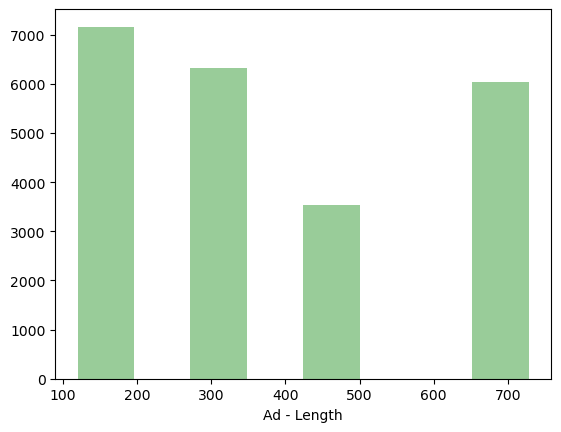

BoxPlot of Ad - Length
----------------------------------------------------------------------------


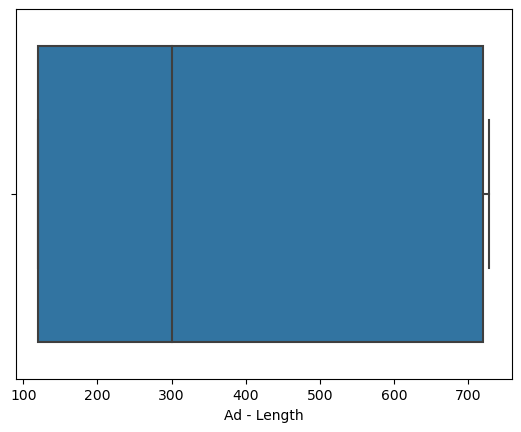

Description of Ad- Width
----------------------------------------------------------------------------
count    23066.000000
mean       337.896037
std        203.092885
min         70.000000
25%        250.000000
50%        300.000000
75%        600.000000
max        600.000000
Name: Ad- Width, dtype: float64 Distribution of Ad- Width
----------------------------------------------------------------------------


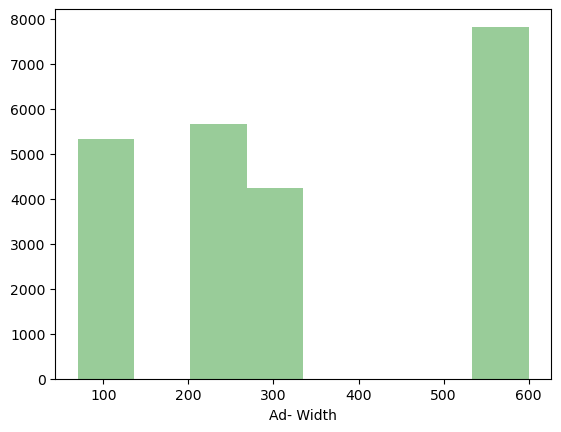

BoxPlot of Ad- Width
----------------------------------------------------------------------------


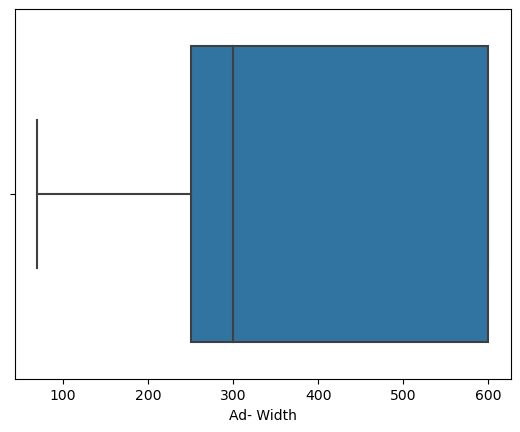

Description of Ad Size
----------------------------------------------------------------------------
count     23066.000000
mean      96674.468048
std       61538.329557
min       33600.000000
25%       72000.000000
50%       72000.000000
75%       84000.000000
max      216000.000000
Name: Ad Size, dtype: float64 Distribution of Ad Size
----------------------------------------------------------------------------


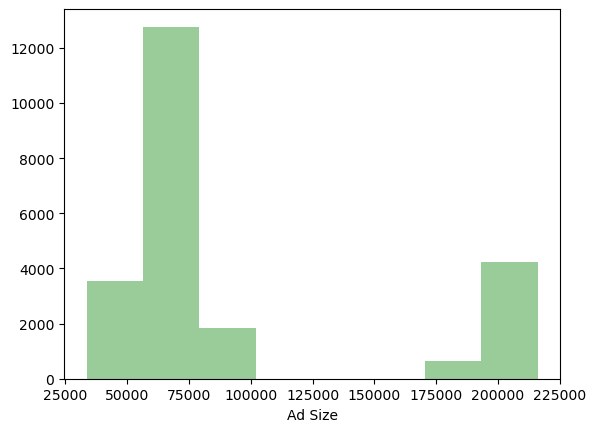

BoxPlot of Ad Size
----------------------------------------------------------------------------


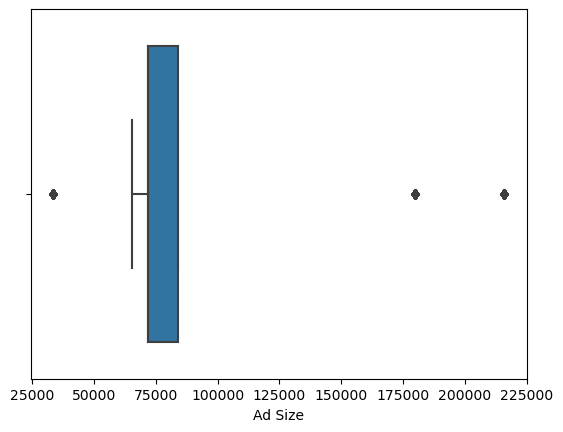

Description of Available_Impressions
----------------------------------------------------------------------------
count    2.306600e+04
mean     2.432044e+06
std      4.742888e+06
min      1.000000e+00
25%      3.367225e+04
50%      4.837710e+05
75%      2.527712e+06
max      2.759286e+07
Name: Available_Impressions, dtype: float64 Distribution of Available_Impressions
----------------------------------------------------------------------------


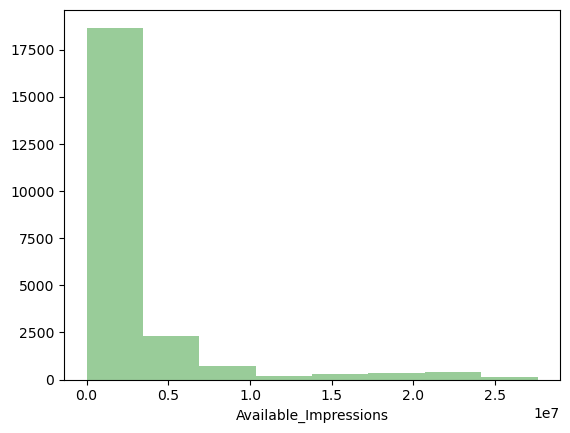

BoxPlot of Available_Impressions
----------------------------------------------------------------------------


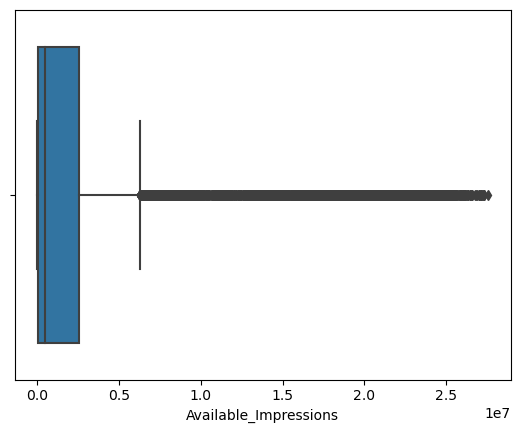

Description of Matched_Queries
----------------------------------------------------------------------------
count    2.306600e+04
mean     1.295099e+06
std      2.512970e+06
min      1.000000e+00
25%      1.828250e+04
50%      2.580875e+05
75%      1.180700e+06
max      1.470202e+07
Name: Matched_Queries, dtype: float64 Distribution of Matched_Queries
----------------------------------------------------------------------------


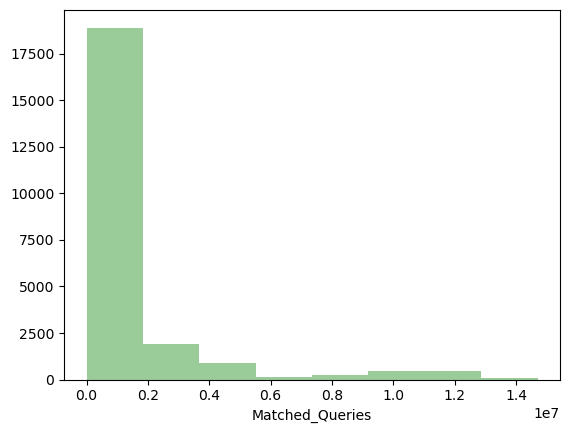

BoxPlot of Matched_Queries
----------------------------------------------------------------------------


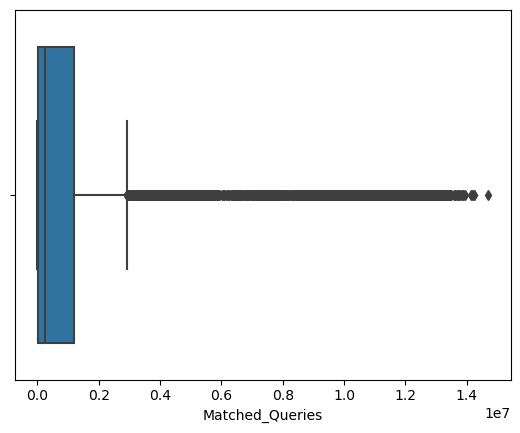

Description of Impressions
----------------------------------------------------------------------------
count    2.306600e+04
mean     1.241520e+06
std      2.429400e+06
min      1.000000e+00
25%      7.990500e+03
50%      2.252900e+05
75%      1.112428e+06
max      1.419477e+07
Name: Impressions, dtype: float64 Distribution of Impressions
----------------------------------------------------------------------------


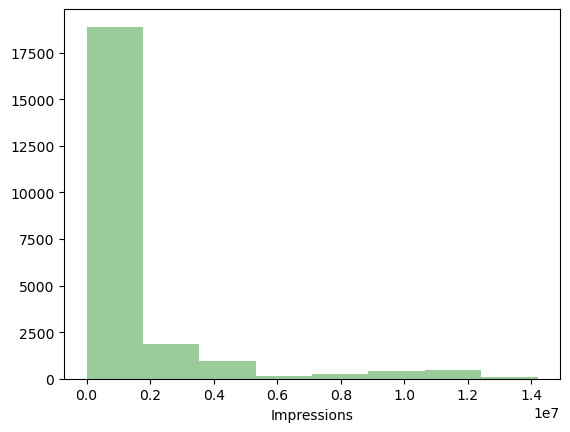

BoxPlot of Impressions
----------------------------------------------------------------------------


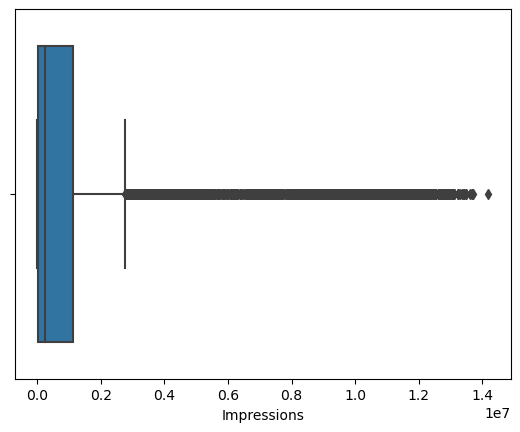

Description of Clicks
----------------------------------------------------------------------------
count     23066.000000
mean      10678.518816
std       17353.409363
min           1.000000
25%         710.000000
50%        4425.000000
75%       12793.750000
max      143049.000000
Name: Clicks, dtype: float64 Distribution of Clicks
----------------------------------------------------------------------------


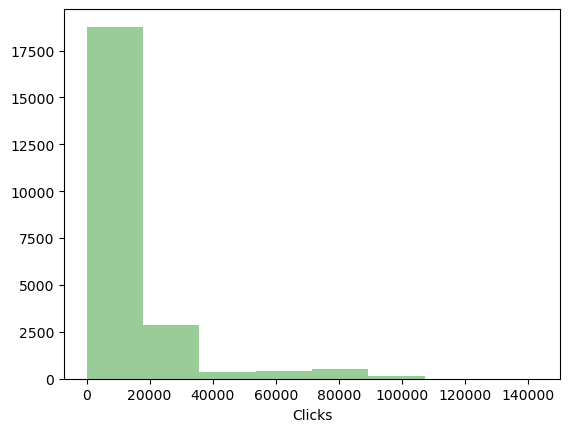

BoxPlot of Clicks
----------------------------------------------------------------------------


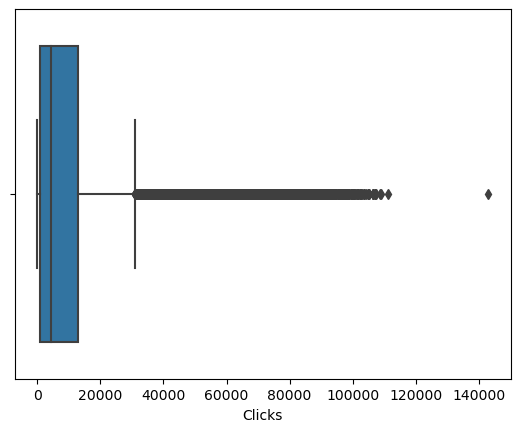

In [10]:
univariateAnalysis_numeric_basic('Ad - Length',8)
univariateAnalysis_numeric_basic('Ad- Width',8)
univariateAnalysis_numeric_basic('Ad Size',8)
univariateAnalysis_numeric_basic('Available_Impressions',8)
univariateAnalysis_numeric_basic('Matched_Queries',8)
univariateAnalysis_numeric_basic('Impressions',8)
univariateAnalysis_numeric_basic('Clicks',8)


In [26]:
df = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df.columns.values)
len(lstnumericcolumns)

13

Description of Ad - Length
----------------------------------------------------------------------------
count    23066.000000
mean       385.163097
std        233.651434
min        120.000000
25%        120.000000
50%        300.000000
75%        720.000000
max        728.000000
Name: Ad - Length, dtype: float64 Distribution of Ad - Length
----------------------------------------------------------------------------


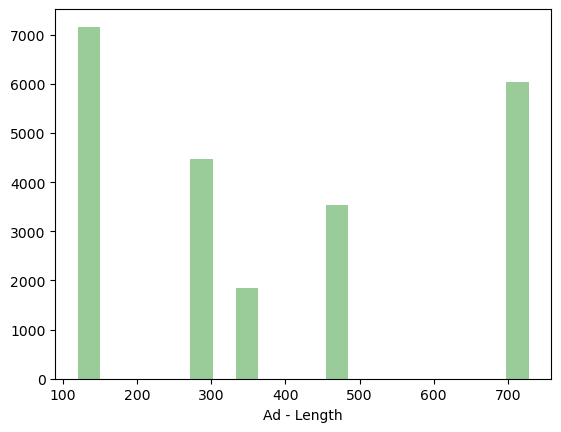

BoxPlot of Ad - Length
----------------------------------------------------------------------------


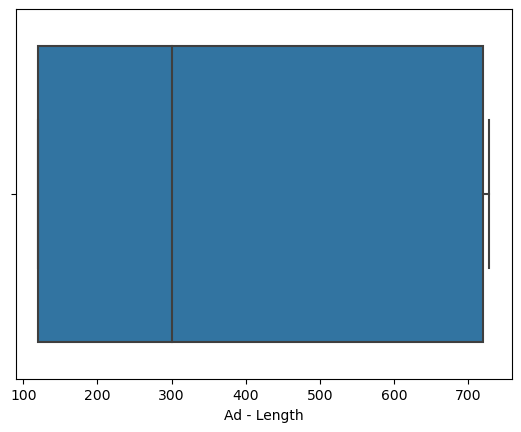

Description of Ad- Width
----------------------------------------------------------------------------
count    23066.000000
mean       337.896037
std        203.092885
min         70.000000
25%        250.000000
50%        300.000000
75%        600.000000
max        600.000000
Name: Ad- Width, dtype: float64 Distribution of Ad- Width
----------------------------------------------------------------------------


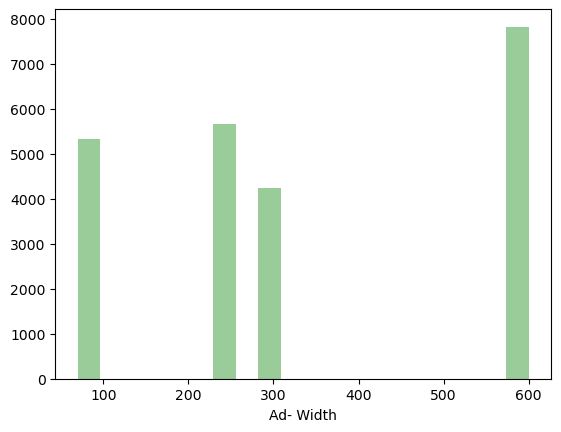

BoxPlot of Ad- Width
----------------------------------------------------------------------------


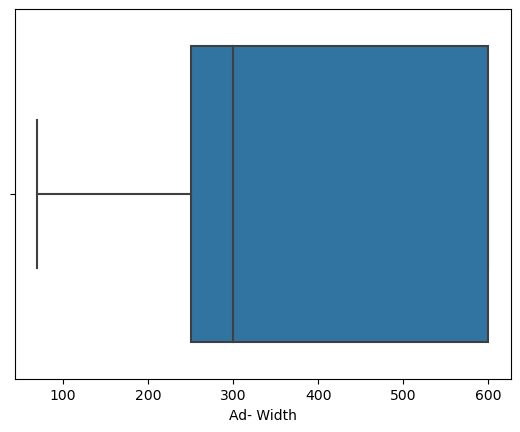

Description of Ad Size
----------------------------------------------------------------------------
count     23066.000000
mean      96674.468048
std       61538.329557
min       33600.000000
25%       72000.000000
50%       72000.000000
75%       84000.000000
max      216000.000000
Name: Ad Size, dtype: float64 Distribution of Ad Size
----------------------------------------------------------------------------


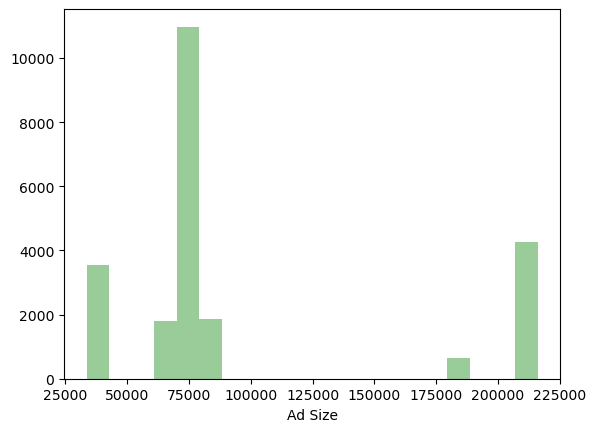

BoxPlot of Ad Size
----------------------------------------------------------------------------


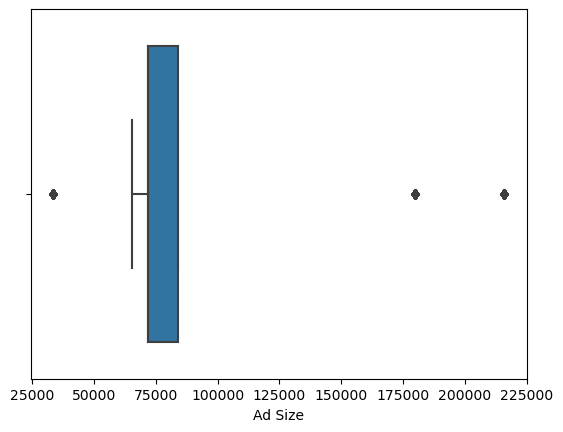

Description of Available_Impressions
----------------------------------------------------------------------------
count    2.306600e+04
mean     2.432044e+06
std      4.742888e+06
min      1.000000e+00
25%      3.367225e+04
50%      4.837710e+05
75%      2.527712e+06
max      2.759286e+07
Name: Available_Impressions, dtype: float64 Distribution of Available_Impressions
----------------------------------------------------------------------------


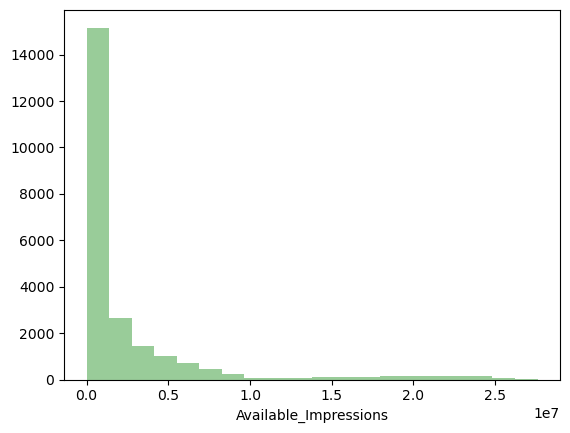

BoxPlot of Available_Impressions
----------------------------------------------------------------------------


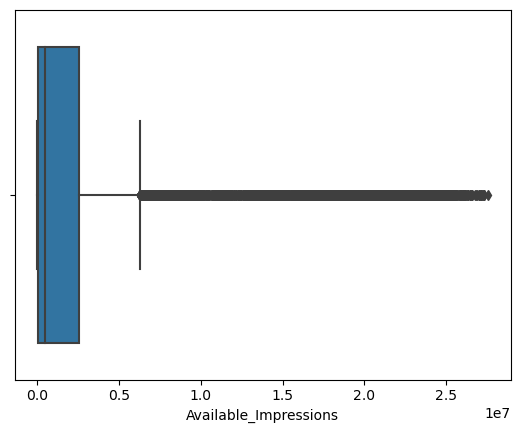

Description of Matched_Queries
----------------------------------------------------------------------------
count    2.306600e+04
mean     1.295099e+06
std      2.512970e+06
min      1.000000e+00
25%      1.828250e+04
50%      2.580875e+05
75%      1.180700e+06
max      1.470202e+07
Name: Matched_Queries, dtype: float64 Distribution of Matched_Queries
----------------------------------------------------------------------------


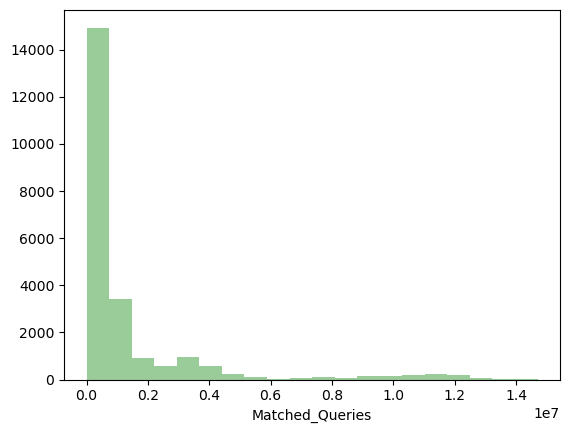

BoxPlot of Matched_Queries
----------------------------------------------------------------------------


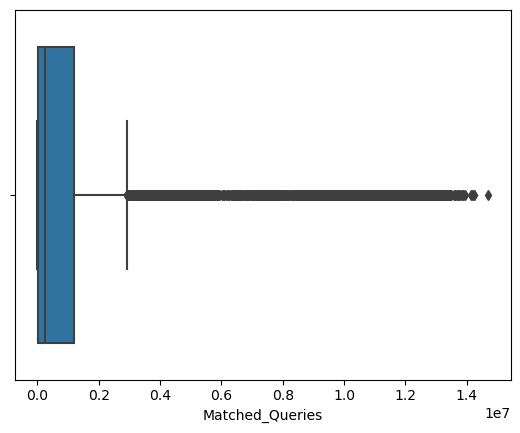

Description of Impressions
----------------------------------------------------------------------------
count    2.306600e+04
mean     1.241520e+06
std      2.429400e+06
min      1.000000e+00
25%      7.990500e+03
50%      2.252900e+05
75%      1.112428e+06
max      1.419477e+07
Name: Impressions, dtype: float64 Distribution of Impressions
----------------------------------------------------------------------------


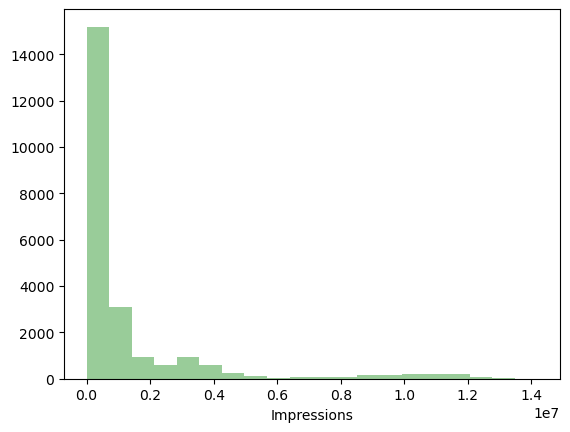

BoxPlot of Impressions
----------------------------------------------------------------------------


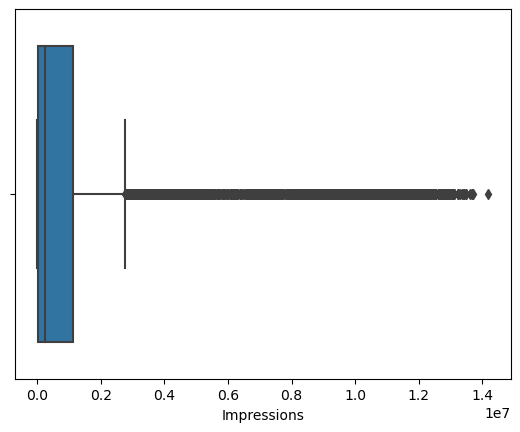

Description of Clicks
----------------------------------------------------------------------------
count     23066.000000
mean      10678.518816
std       17353.409363
min           1.000000
25%         710.000000
50%        4425.000000
75%       12793.750000
max      143049.000000
Name: Clicks, dtype: float64 Distribution of Clicks
----------------------------------------------------------------------------


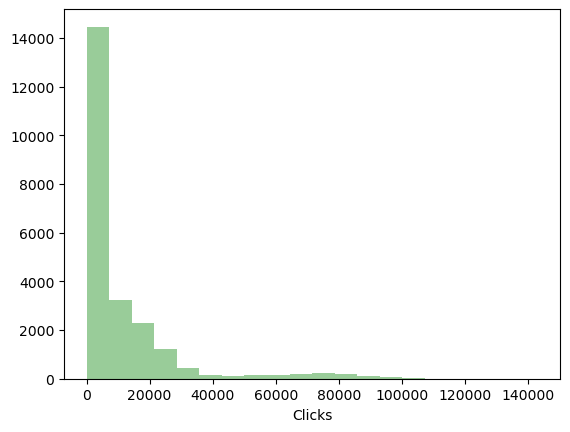

BoxPlot of Clicks
----------------------------------------------------------------------------


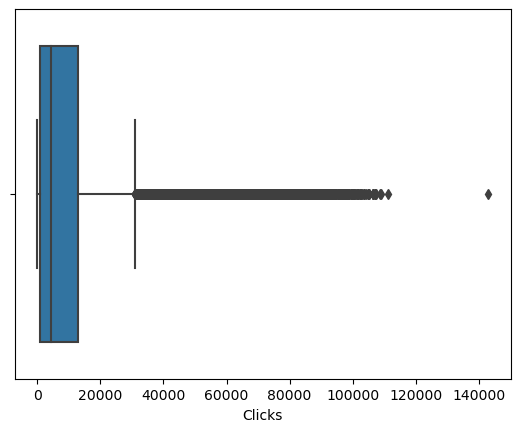

Description of Spend
----------------------------------------------------------------------------
count    23066.000000
mean      2706.625689
std       4067.927273
min          0.000000
25%         85.180000
50%       1425.125000
75%       3121.400000
max      26931.870000
Name: Spend, dtype: float64 Distribution of Spend
----------------------------------------------------------------------------


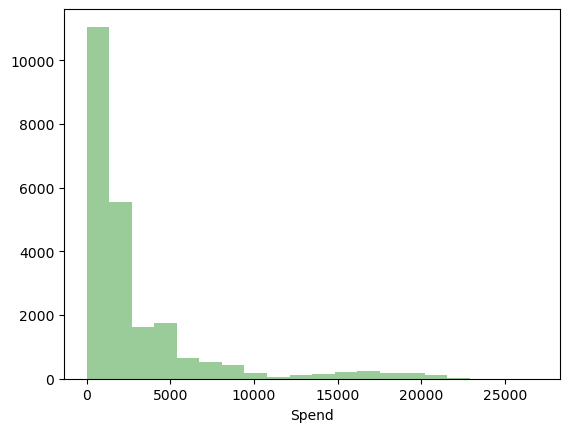

BoxPlot of Spend
----------------------------------------------------------------------------


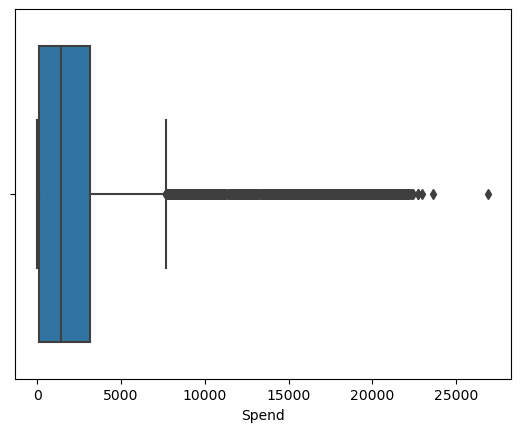

Description of Fee
----------------------------------------------------------------------------
count    23066.000000
mean         0.335123
std          0.031963
min          0.210000
25%          0.330000
50%          0.350000
75%          0.350000
max          0.350000
Name: Fee, dtype: float64 Distribution of Fee
----------------------------------------------------------------------------


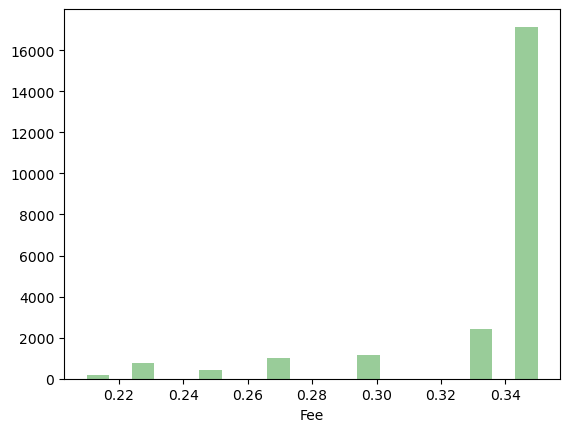

BoxPlot of Fee
----------------------------------------------------------------------------


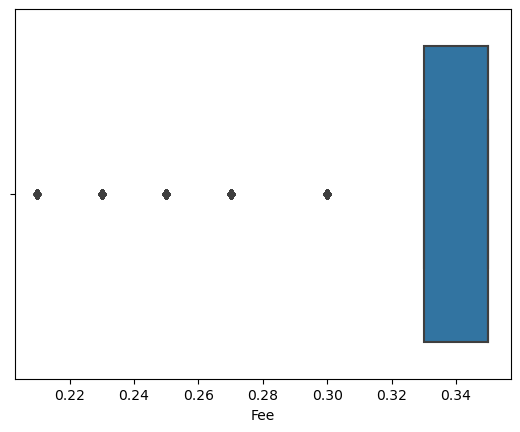

Description of Revenue
----------------------------------------------------------------------------
count    23066.000000
mean      1924.252331
std       3105.238410
min          0.000000
25%         55.365375
50%        926.335000
75%       2091.338150
max      21276.180000
Name: Revenue, dtype: float64 Distribution of Revenue
----------------------------------------------------------------------------


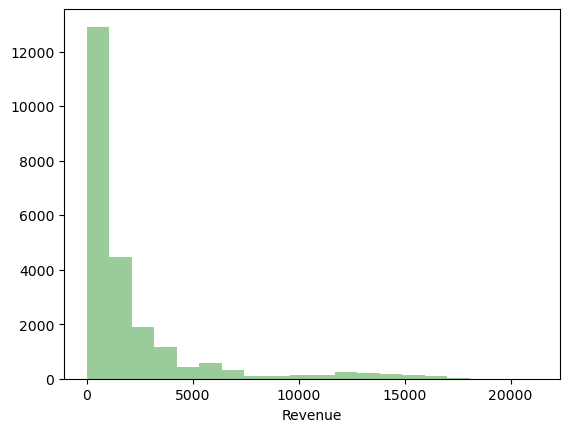

BoxPlot of Revenue
----------------------------------------------------------------------------


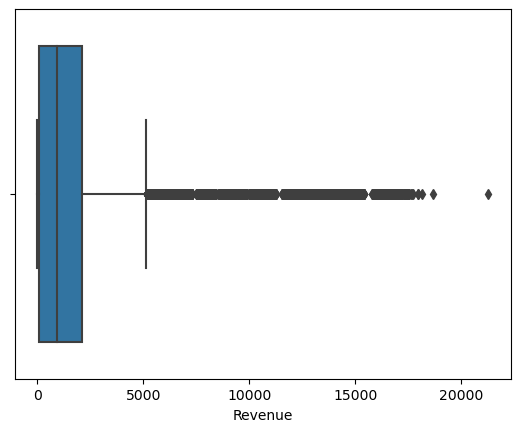

Description of CTR
----------------------------------------------------------------------------
count    18330.000000
mean         0.073661
std          0.075160
min          0.000100
25%          0.002600
50%          0.082550
75%          0.130000
max          1.000000
Name: CTR, dtype: float64 Distribution of CTR
----------------------------------------------------------------------------


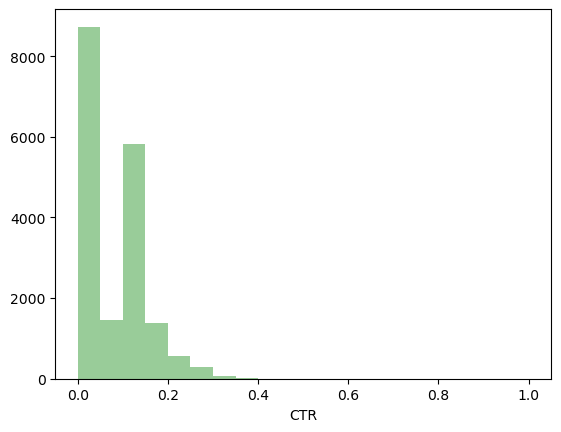

BoxPlot of CTR
----------------------------------------------------------------------------


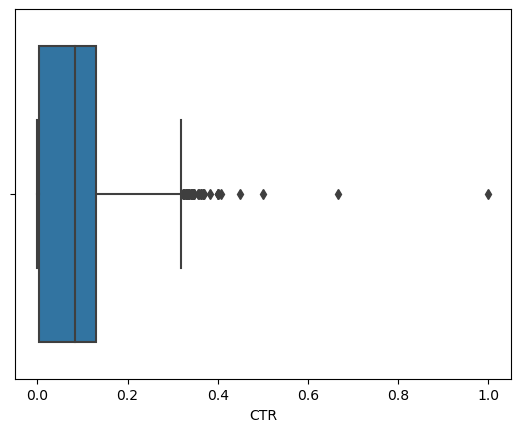

Description of CPM
----------------------------------------------------------------------------
count    18330.000000
mean         7.672045
std          6.481391
min          0.000000
25%          1.710000
50%          7.660000
75%         12.510000
max         81.560000
Name: CPM, dtype: float64 Distribution of CPM
----------------------------------------------------------------------------


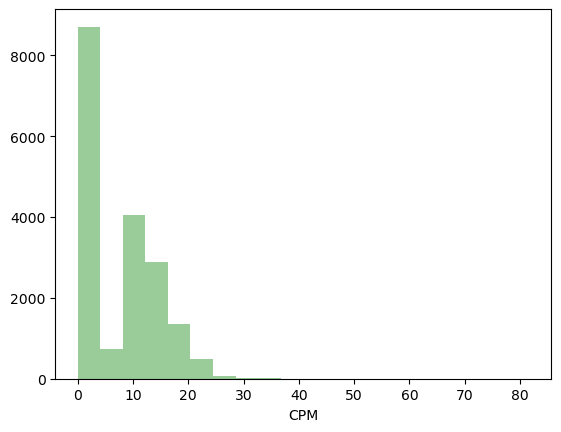

BoxPlot of CPM
----------------------------------------------------------------------------


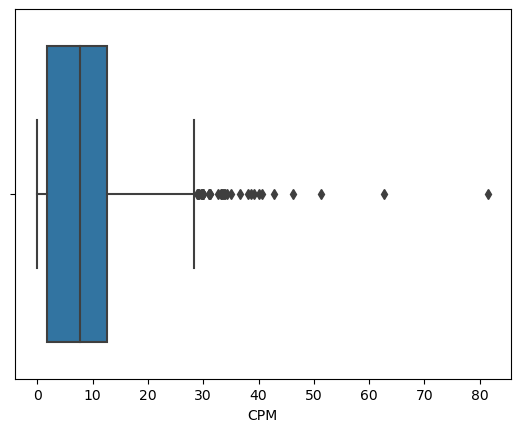

Description of CPC
----------------------------------------------------------------------------
count    18330.000000
mean         0.351061
std          0.343334
min          0.000000
25%          0.090000
50%          0.160000
75%          0.570000
max          7.260000
Name: CPC, dtype: float64 Distribution of CPC
----------------------------------------------------------------------------


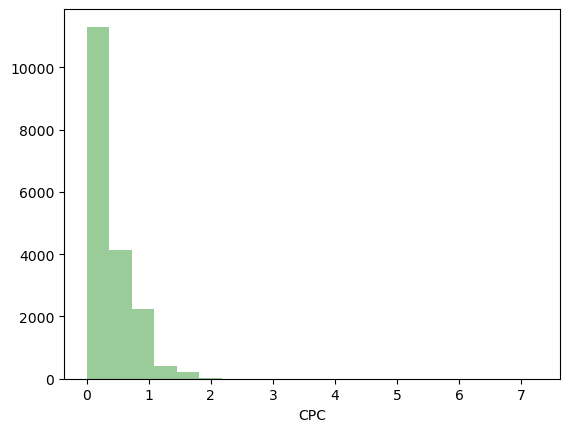

BoxPlot of CPC
----------------------------------------------------------------------------


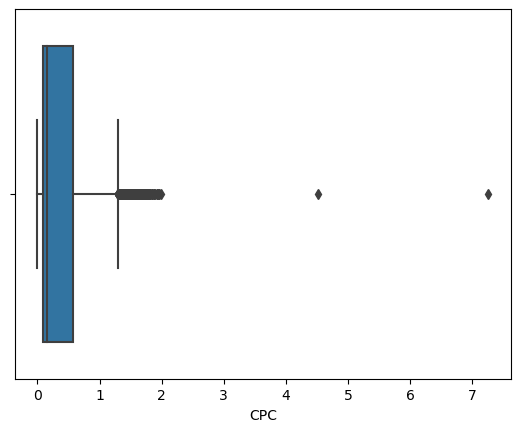

In [12]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric_basic(x,20)

### Bivariate analysis

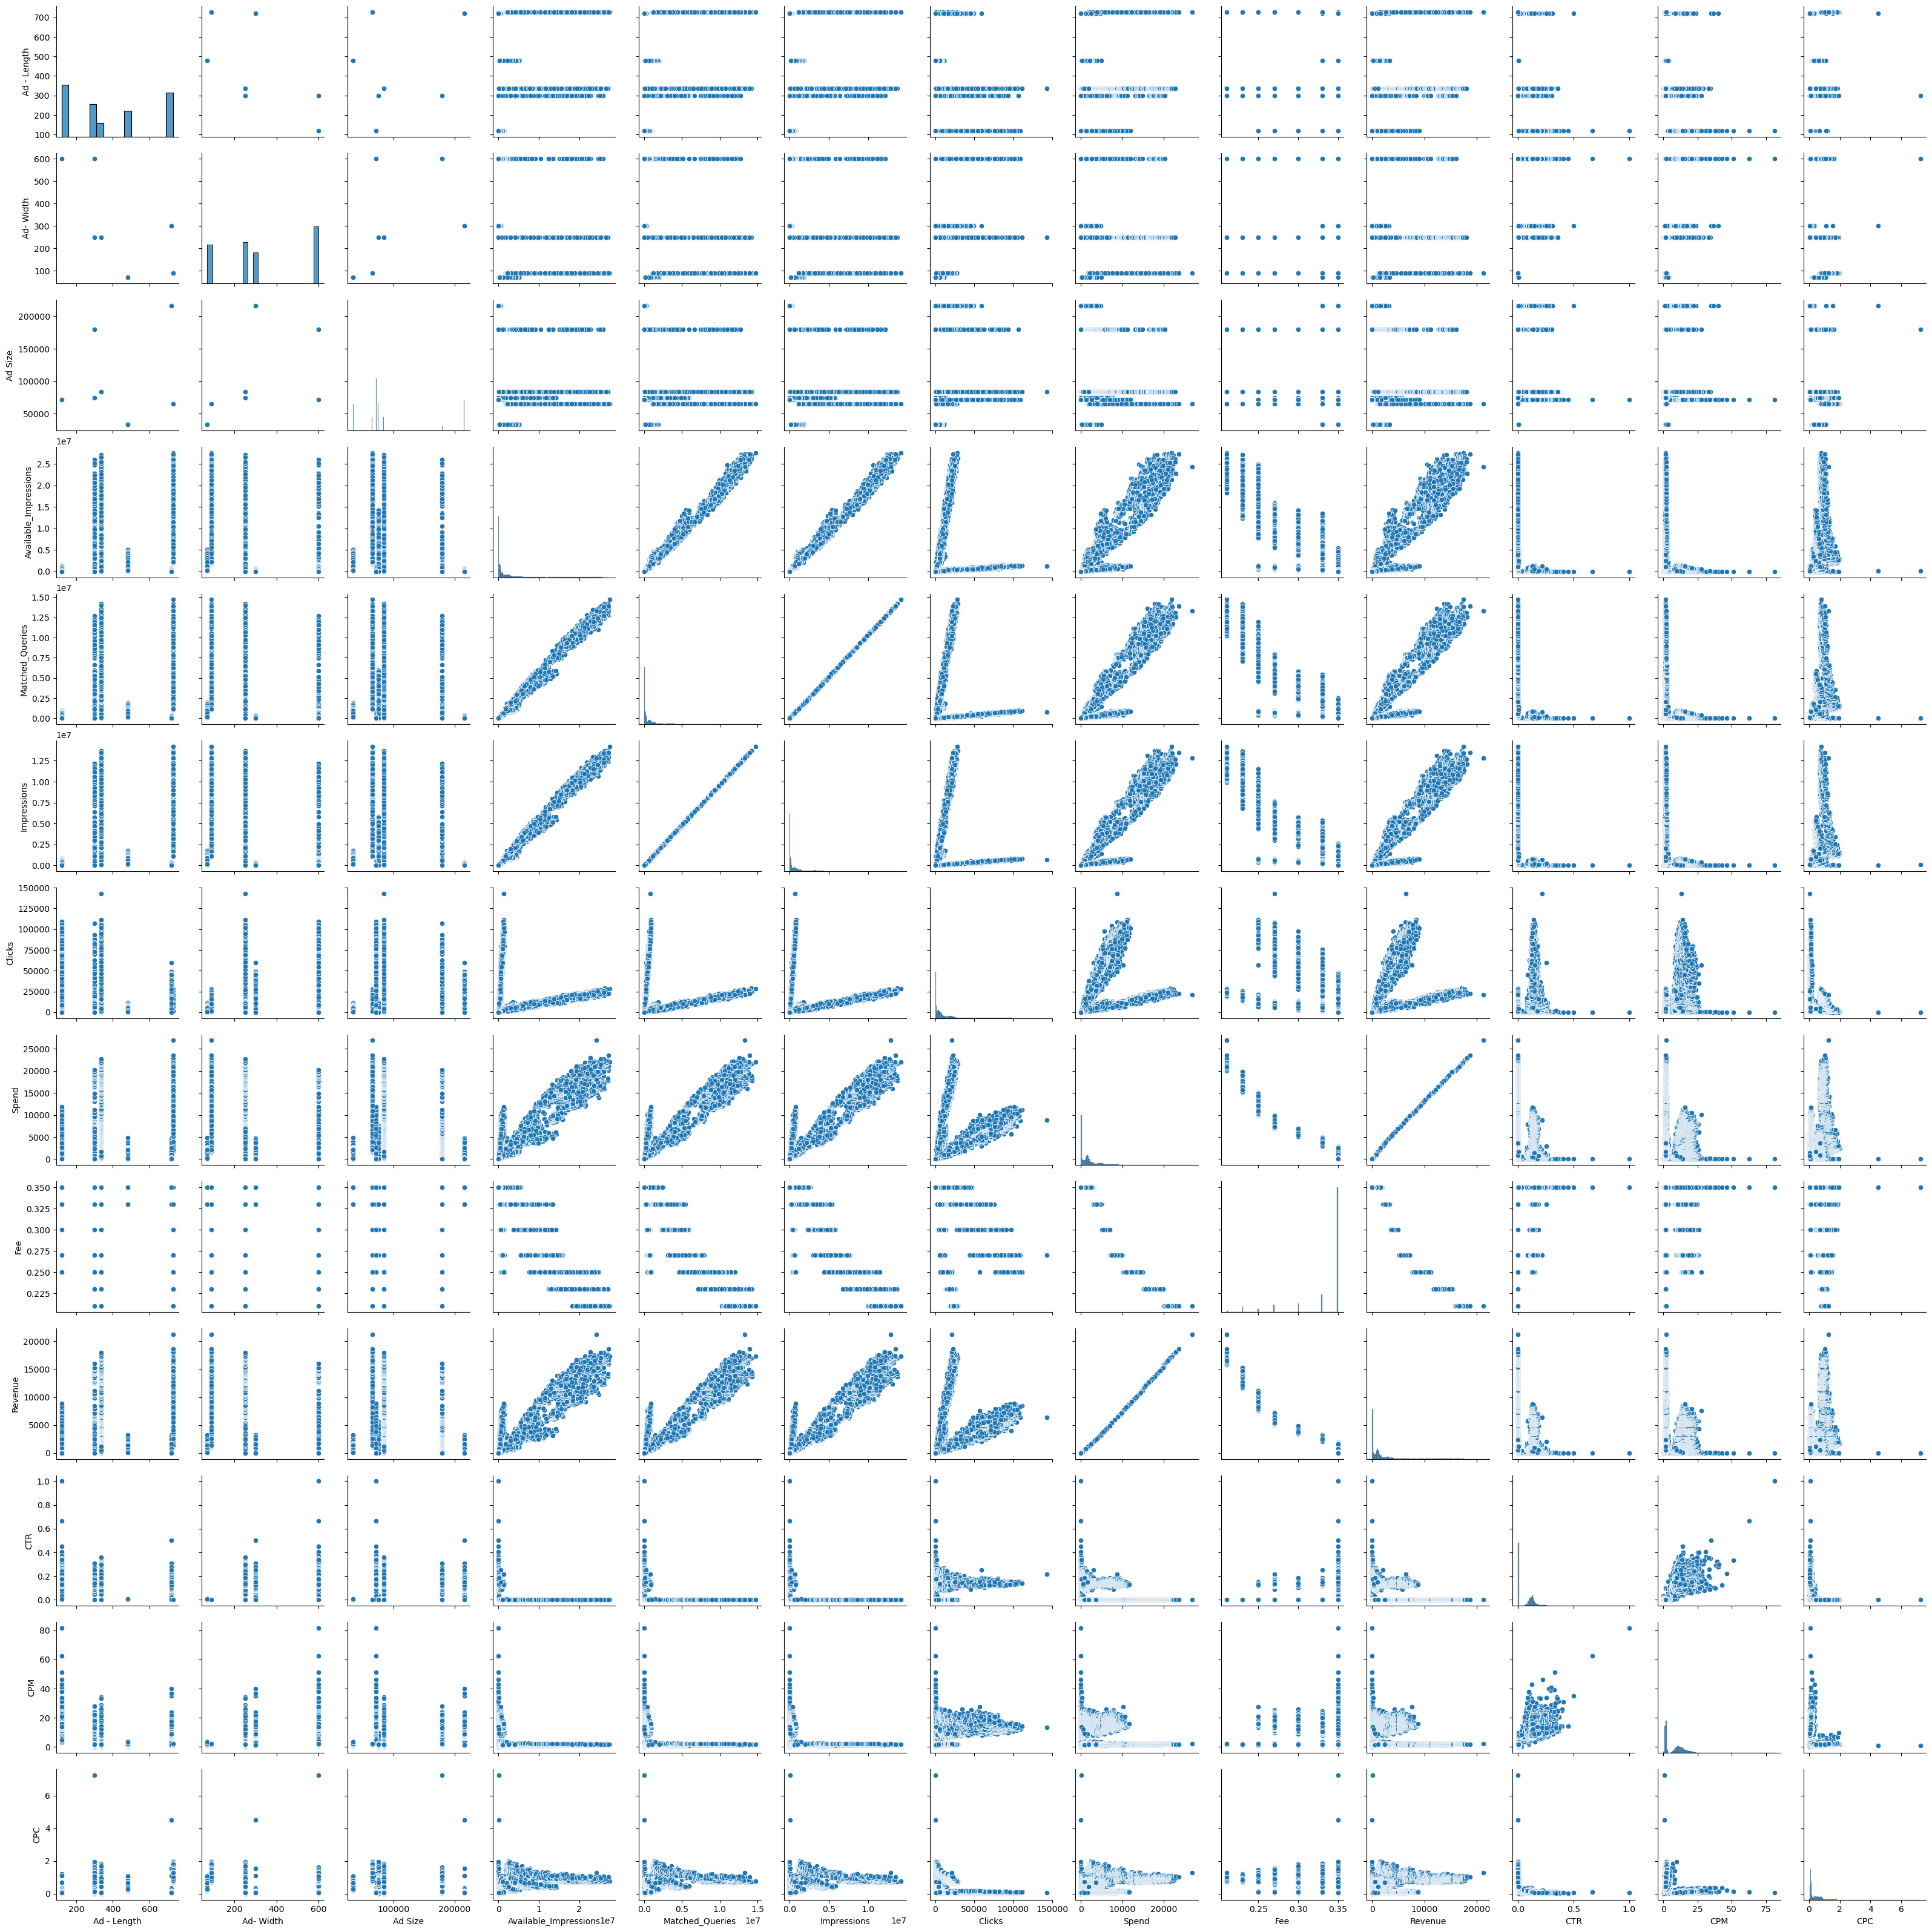

In [13]:
sns.pairplot(df)

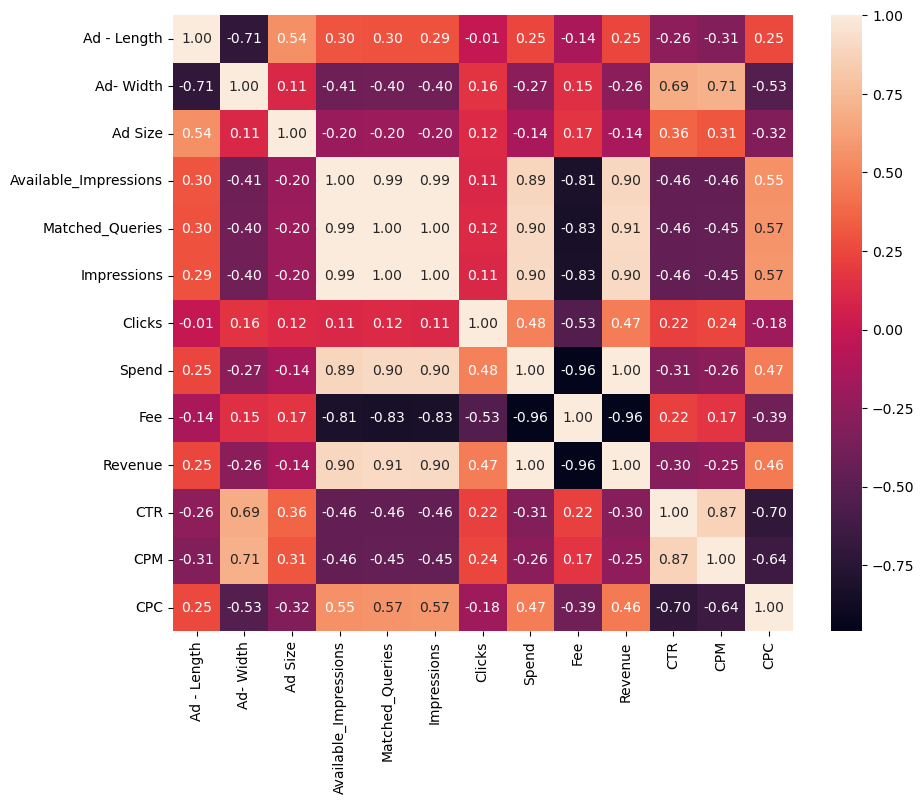

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f');

### Missing value check and treatment

In [15]:
df.isnull().sum()

Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [16]:
## there is some missing values in CTR CPM CPC

In [17]:
def calculate_missing_val(val):
    if val == 'CTR':
        return (df.Clicks/df.Impressions) * 100
    elif val == 'CPM':
        return (df.Spend/df.Impressions) * 1000
    elif val == 'CPC':
        return df.Spend/df.Clicks

In [18]:
df['CTR']= df[['CTR']].apply(lambda x: calculate_missing_val('CTR'))
df['CPM']= df[['CPM']].apply(lambda y: calculate_missing_val('CPM'))
df['CPC']= df[['CPC']].apply(lambda z: calculate_missing_val('CPC'))

In [19]:
df.isnull().sum()

Ad - Length              0
Ad- Width                0
Ad Size                  0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

### Outlier Treatment

The description statistics for 'Ad - Length' column is:


count    23066.000000
mean       385.163097
std        233.651434
min        120.000000
25%        120.000000
50%        300.000000
75%        720.000000
max        728.000000
Name: Ad - Length, dtype: float64


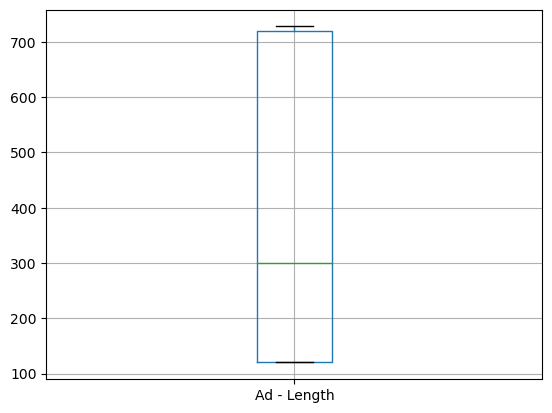

The description statistics for 'Ad- Width' column is:


count    23066.000000
mean       337.896037
std        203.092885
min         70.000000
25%        250.000000
50%        300.000000
75%        600.000000
max        600.000000
Name: Ad- Width, dtype: float64


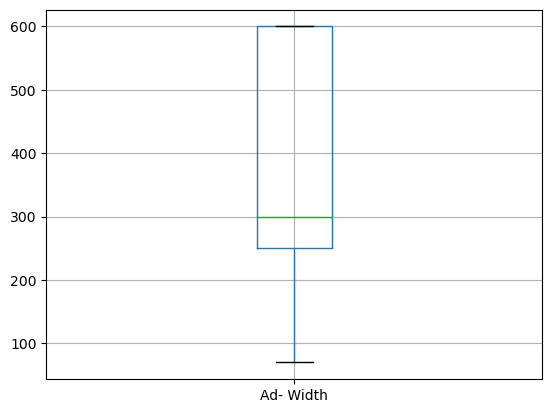

The description statistics for 'Ad Size' column is:


count     23066.000000
mean      96674.468048
std       61538.329557
min       33600.000000
25%       72000.000000
50%       72000.000000
75%       84000.000000
max      216000.000000
Name: Ad Size, dtype: float64


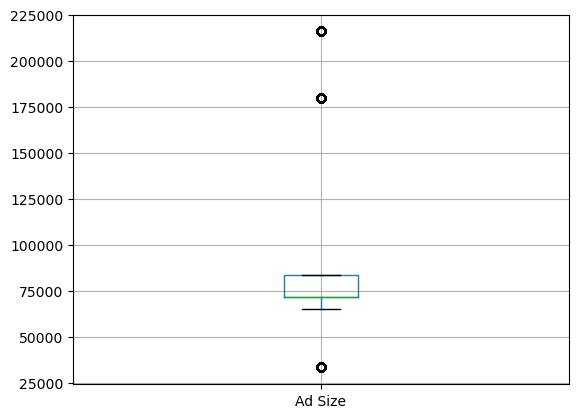

The description statistics for 'Available_Impressions' column is:


count    2.306600e+04
mean     2.432044e+06
std      4.742888e+06
min      1.000000e+00
25%      3.367225e+04
50%      4.837710e+05
75%      2.527712e+06
max      2.759286e+07
Name: Available_Impressions, dtype: float64


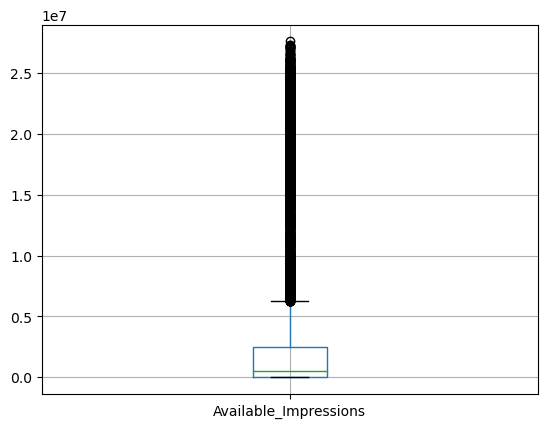

The description statistics for 'Matched_Queries' column is:


count    2.306600e+04
mean     1.295099e+06
std      2.512970e+06
min      1.000000e+00
25%      1.828250e+04
50%      2.580875e+05
75%      1.180700e+06
max      1.470202e+07
Name: Matched_Queries, dtype: float64


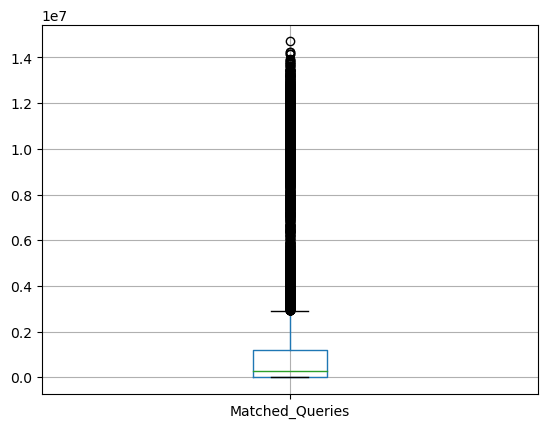

The description statistics for 'Impressions' column is:


count    2.306600e+04
mean     1.241520e+06
std      2.429400e+06
min      1.000000e+00
25%      7.990500e+03
50%      2.252900e+05
75%      1.112428e+06
max      1.419477e+07
Name: Impressions, dtype: float64


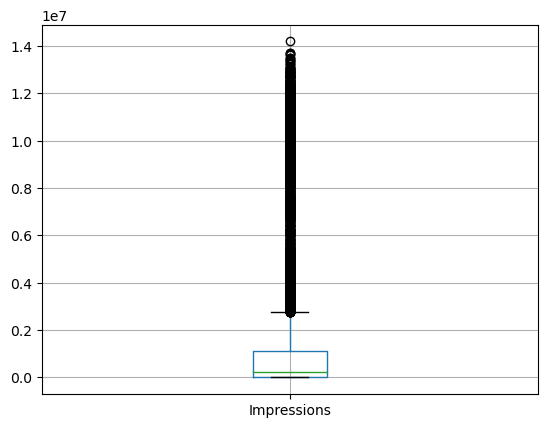

The description statistics for 'Clicks' column is:


count     23066.000000
mean      10678.518816
std       17353.409363
min           1.000000
25%         710.000000
50%        4425.000000
75%       12793.750000
max      143049.000000
Name: Clicks, dtype: float64


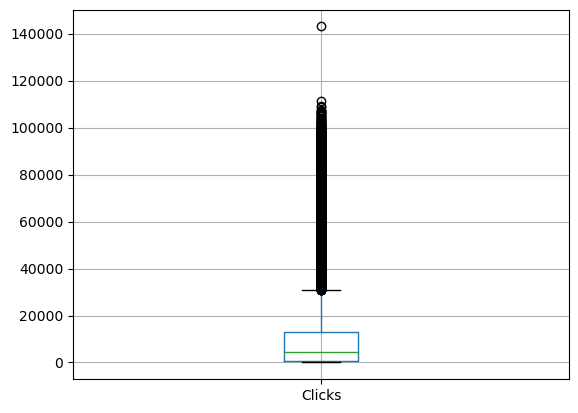

The description statistics for 'Spend' column is:


count    23066.000000
mean      2706.625689
std       4067.927273
min          0.000000
25%         85.180000
50%       1425.125000
75%       3121.400000
max      26931.870000
Name: Spend, dtype: float64


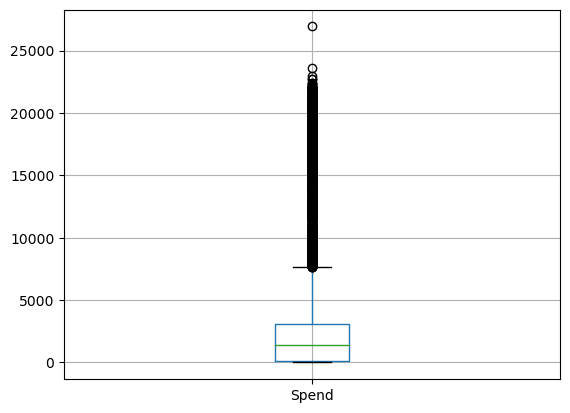

The description statistics for 'Fee' column is:


count    23066.000000
mean         0.335123
std          0.031963
min          0.210000
25%          0.330000
50%          0.350000
75%          0.350000
max          0.350000
Name: Fee, dtype: float64


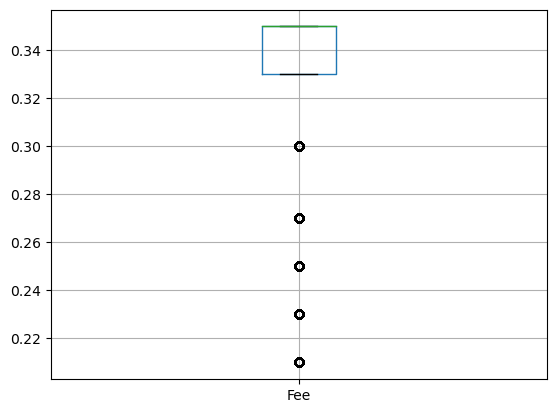

The description statistics for 'Revenue' column is:


count    23066.000000
mean      1924.252331
std       3105.238410
min          0.000000
25%         55.365375
50%        926.335000
75%       2091.338150
max      21276.180000
Name: Revenue, dtype: float64


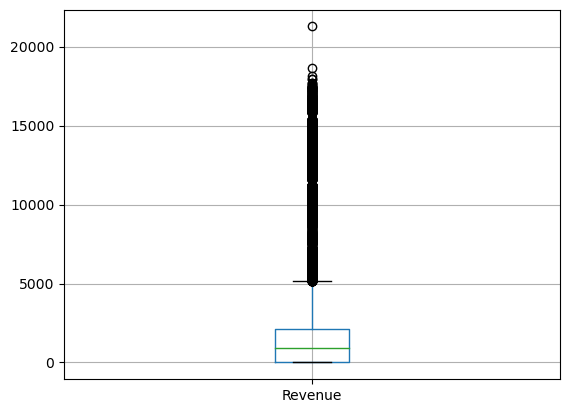

The description statistics for 'CTR' column is:


count    23066.000000
mean         8.409941
std          9.262048
min          0.010874
25%          0.265107
50%          9.391248
75%         13.470571
max        200.000000
Name: CTR, dtype: float64


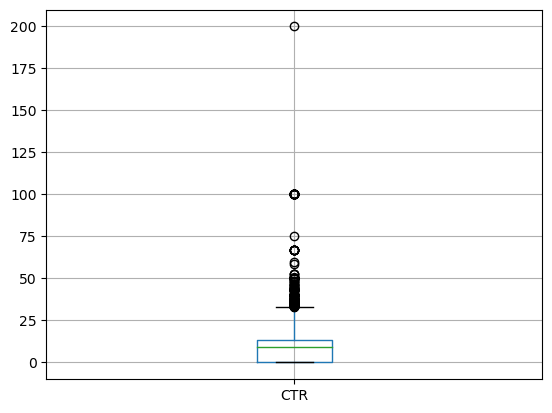

The description statistics for 'CPM' column is:


count    23066.000000
mean         8.396849
std          9.057760
min          0.000000
25%          1.749084
50%          8.371566
75%         13.042018
max        715.000000
Name: CPM, dtype: float64


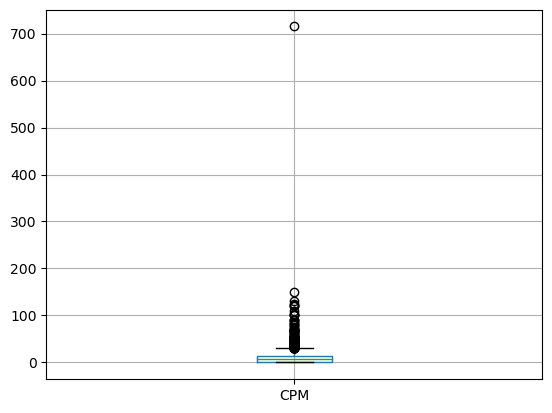

The description statistics for 'CPC' column is:


count    23066.000000
mean         0.336678
std          0.341253
min          0.000000
25%          0.089736
50%          0.139347
75%          0.546242
max          7.264000
Name: CPC, dtype: float64


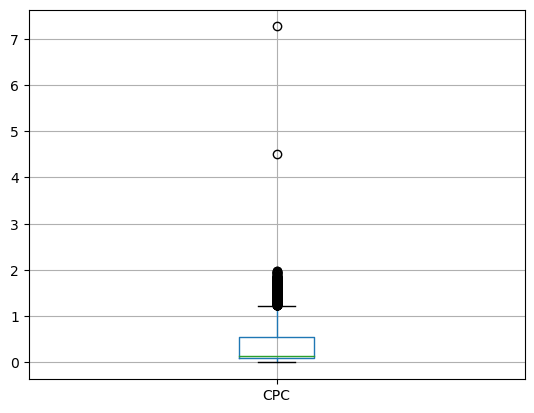

In [20]:
for i in range(len(df.columns)):
    print("The description statistics for '{}' column is:".format(lstnumericcolumns[i]))
    print('\n')
    print(df[lstnumericcolumns[i]].describe())
    df.boxplot(column=lstnumericcolumns[i])
    plt.show()

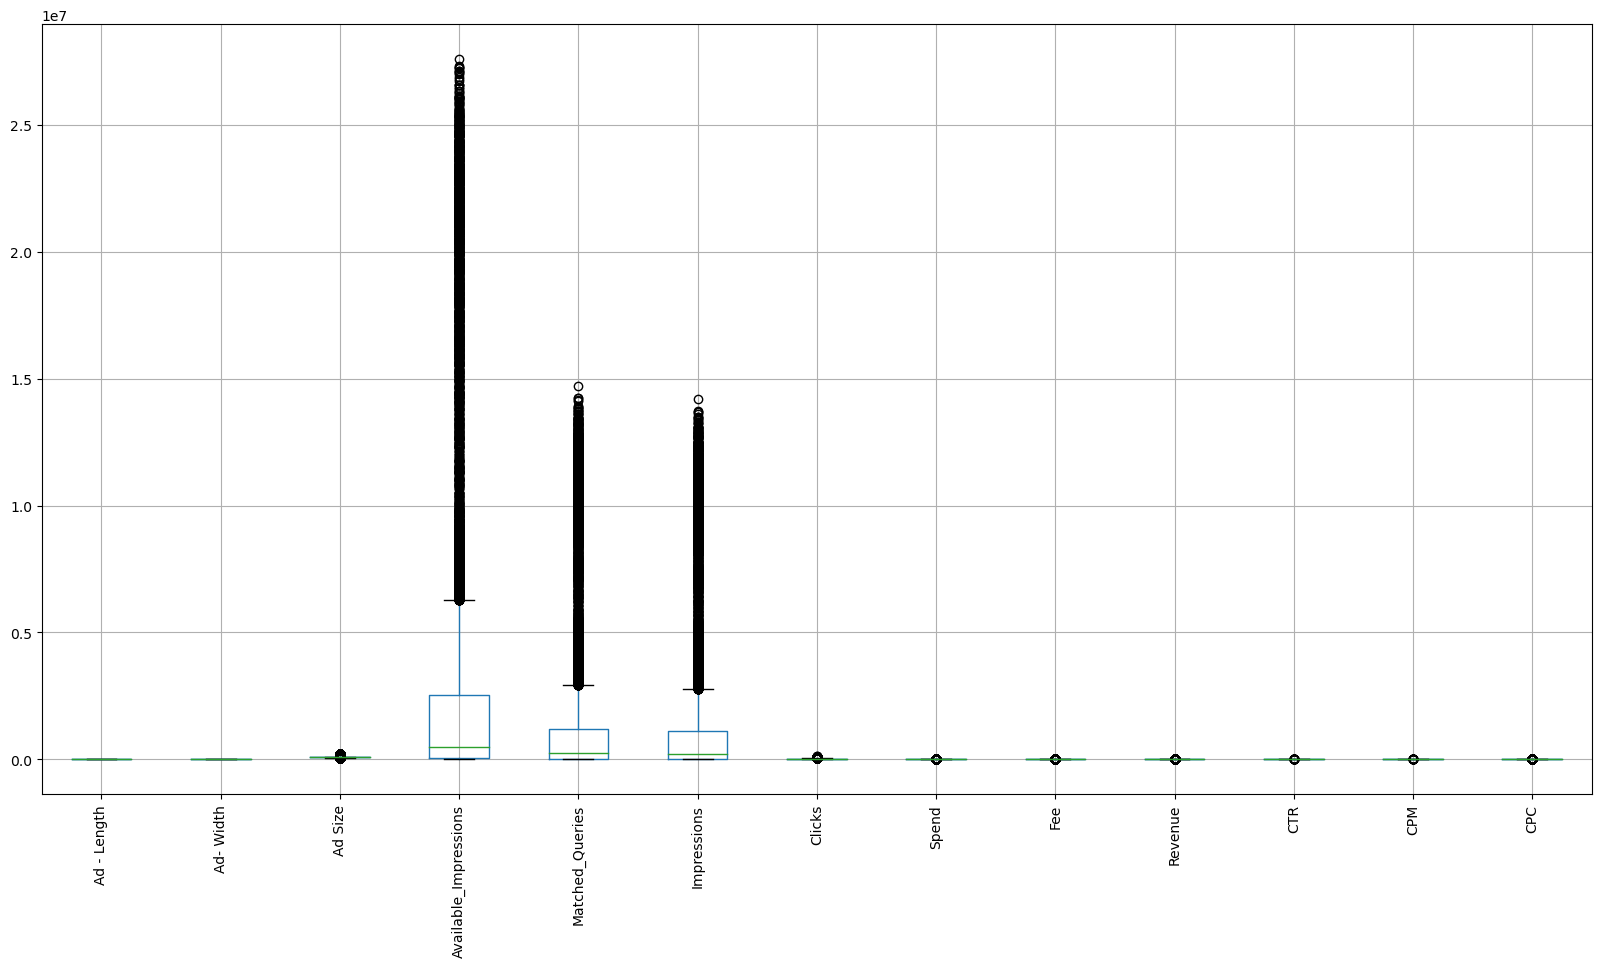

In [21]:
df.boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

In [21]:
def detect_outlier(col):
    Q1,Q3=np.percentile(col,(25,75))
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range
for column in df:
    
    lr,ur=detect_outlier(df[column])

    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

In [23]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [24]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Ad - Length              0
Ad- Width                0
Ad Size                  0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [25]:
((df > (Q3 + 1.5 * IQR)) & (df < df.quantile(0.95))).sum()

Ad - Length              0
Ad- Width                0
Ad Size                  0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [26]:
no_outliers=['Ad - Length','Ad- Width']

In [27]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    q95=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: q95 if y > q95 else y).apply(lambda y: q5 if y < q5 else y)

In [28]:
outlier_list = [x for x in df.columns if x not in no_outliers]

In [29]:
for i in df[outlier_list]:    
    df[i]=treat_outlier(df[i])

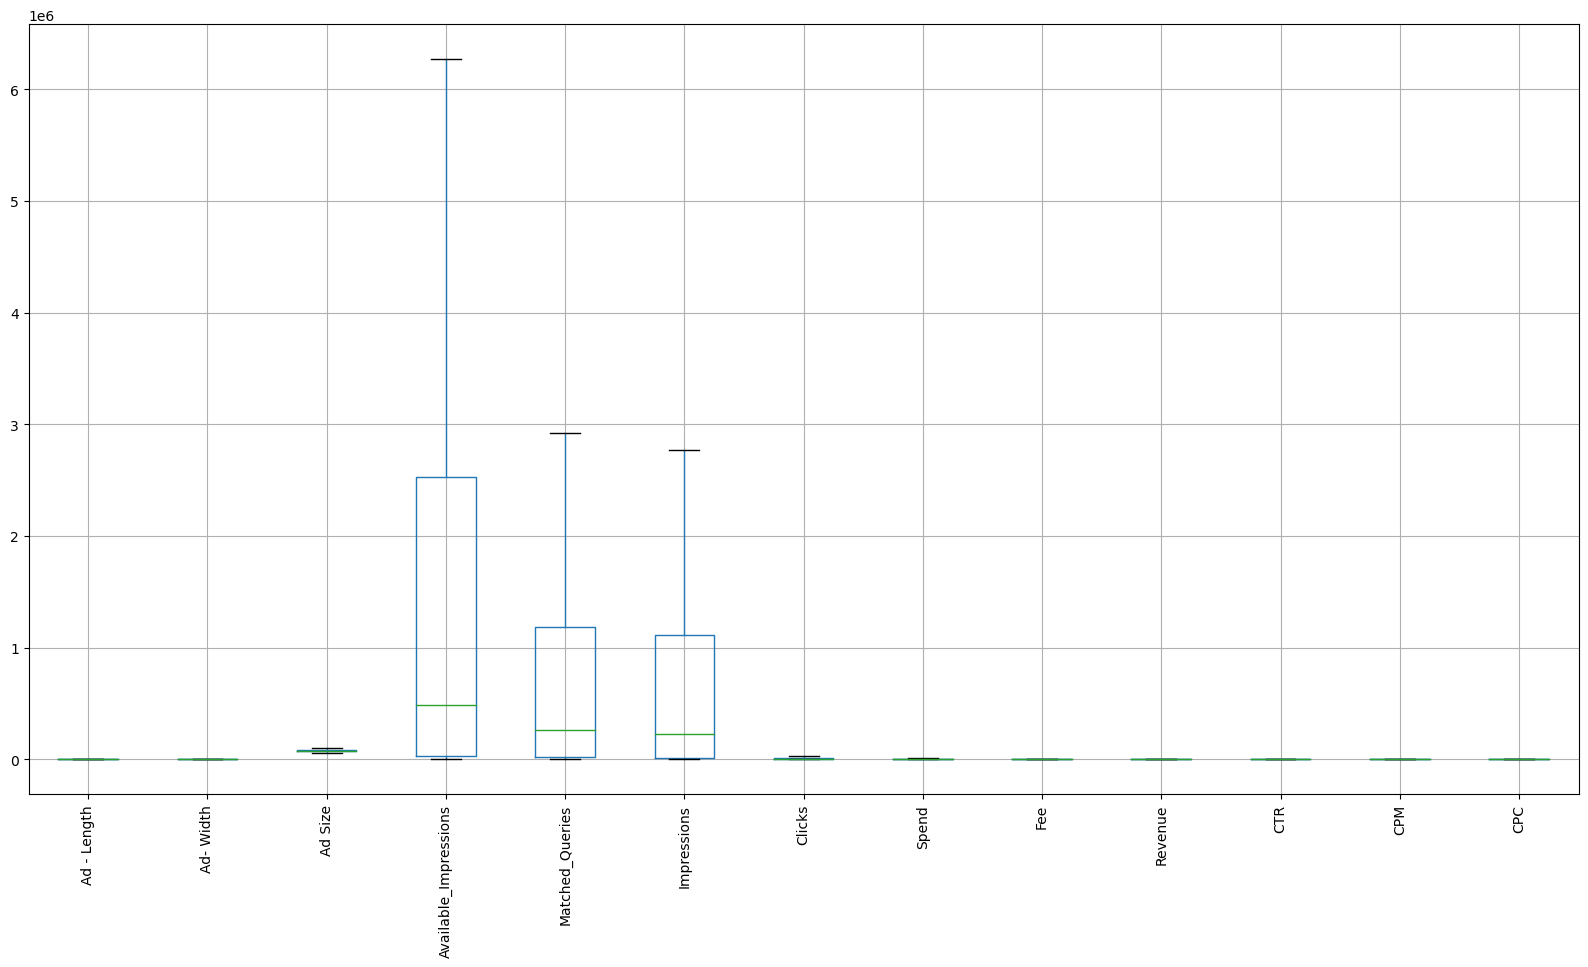

In [30]:
df.boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

In [31]:
from scipy.stats import zscore
data_scaled=df.apply(zscore)
data_scaled.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.102518,-0.755347,-0.778958,-0.768487,-0.866322,-0.892774,0.535724,-0.879713,-0.999543,-1.067315,-0.908581
1,-0.364496,-0.432797,-0.102518,-0.755359,-0.778997,-0.768525,-0.866322,-0.892774,0.535724,-0.879713,-0.994171,-1.067315,-0.908581
2,-0.364496,-0.432797,-0.102518,-0.754914,-0.778928,-0.768454,-0.866322,-0.892774,0.535724,-0.879713,-1.003175,-1.067315,-0.908581
3,-0.364496,-0.432797,-0.102518,-0.755053,-0.778791,-0.768311,-0.866322,-0.892774,0.535724,-0.879713,-1.013543,-1.067315,-0.908581
4,-0.364496,-0.432797,-0.102518,-0.755624,-0.779039,-0.768569,-0.866322,-0.892774,0.535724,-0.879713,-0.986058,-1.067315,-0.908581


### Hierarchical Clustering

#### Creating the Dendrogram

In [32]:
wardlink = linkage(data_scaled, method = 'ward')

In [33]:
# dend=dendrogram(wardlink)

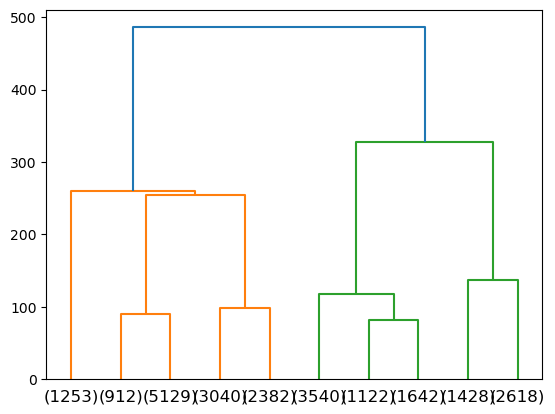

In [34]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [35]:
from scipy.cluster.hierarchy import fcluster

In [36]:
clusters = fcluster(wardlink, 4, criterion='maxclust')
clusters

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

In [37]:
df['clusters'] = clusters

In [38]:
df.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters
0,300.0,250.0,75000.0,1806.0,325.0,323.0,13.0,1.03,0.35,0.6695,0.309598,1.194793,0.056989,3
1,300.0,250.0,75000.0,1780.0,285.0,285.0,13.0,1.03,0.35,0.6695,0.350877,1.194793,0.056989,3
2,300.0,250.0,75000.0,2727.0,356.0,355.0,13.0,1.03,0.35,0.6695,0.281690,1.194793,0.056989,3
3,300.0,250.0,75000.0,2430.0,497.0,495.0,13.0,1.03,0.35,0.6695,0.202020,1.194793,0.056989,3
4,300.0,250.0,75000.0,1218.0,242.0,242.0,13.0,1.03,0.35,0.6695,0.413223,1.194793,0.056989,3


###  K-means Clustering

In [39]:
k_means = KMeans(n_clusters = 2,random_state=1)

In [40]:
k_means.fit(data_scaled)

KMeans(n_clusters=2, random_state=1)

In [41]:
k_means.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [42]:
k_means.inertia_

179488.66712803915

In [43]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(data_scaled)
k_means.inertia_

126935.29007022727

In [44]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(data_scaled)
k_means.inertia_

91147.13337696553

In [45]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(data_scaled)
round(k_means.inertia_,2)

57546.99

In [46]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(data_scaled)
round(k_means.inertia_,2)

48440.13

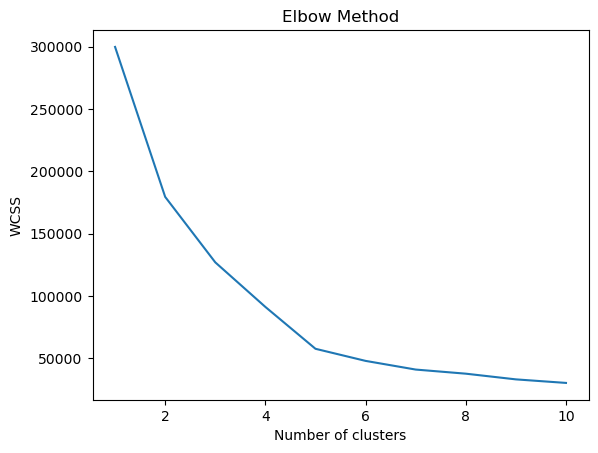

In [47]:
from sklearn.cluster import KMeans

# Create an empty list to store the WCSS values
wcss = []

# Perform KMeans for n=1 to n=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [48]:
from sklearn.metrics import silhouette_score
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:
    
    # initialize K means
    kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_scaled)
    cluster_labels=kmeans.labels_
    
    #Silhouette Score
    silhouette_avg = silhouette_score(data_scaled,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3977892252512646
For n_clusters=3, the silhouette score is 0.39662932009767726
For n_clusters=4, the silhouette score is 0.4584681917080503
For n_clusters=5, the silhouette score is 0.5341384005168475
For n_clusters=6, the silhouette score is 0.5317444491186348
For n_clusters=7, the silhouette score is 0.5235442806256988
For n_clusters=8, the silhouette score is 0.48613112904466055
For n_clusters=9, the silhouette score is 0.43587787244658377
For n_clusters=10, the silhouette score is 0.42997613496885256


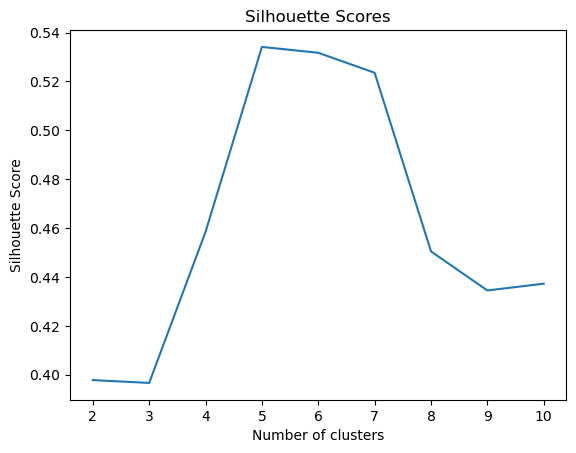

In [49]:
# Create an empty list to store the silhouette scores
silhouette_scores = []

# Perform KMeans for n=2 to n=10
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Problem PCA:

PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

## loading the data 

In [31]:
df_pca=pd.read_excel("PCA+India+Data_Census.xlsx")

### Checking the shape of the dataset

In [32]:
df_pca.shape

(640, 61)

### Checking the data types of the columns for the dataset

In [33]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

### checking the statistical summary in dataset

In [34]:
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [35]:
#EDA using 5 variables:

#Here, we will use the following 5 variables for EDA:

# Select 5 variables for EDA.
eda_variables = ['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06']

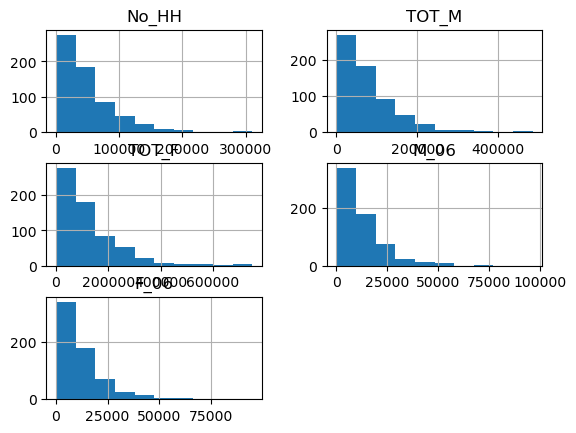

In [36]:
eda_data = df_pca[eda_variables]
#We can now visualize the data using histograms.
# Create histograms for each variable.
eda_data.hist()
plt.show()

In [37]:
def gender_ratio(data_pca):
  male_count = df_pca['TOT_M'].sum()
  female_count = df_pca['TOT_F'].sum()
  gender_ratio = male_count / female_count
  return gender_ratio

# Calculate the gender ratio for each state.
gender_ratios = df_pca.groupby(['State'])[['TOT_M','TOT_F']].apply(gender_ratio)

# Get the state with the highest and lowest gender ratios.
highest_gender_ratio_state = gender_ratios.idxmax()
lowest_gender_ratio_state = gender_ratios.idxmin()

print('Highest gender ratio state:', highest_gender_ratio_state)
print('Lowest gender ratio state:', lowest_gender_ratio_state)

Highest gender ratio state: Andaman & Nicobar Island
Lowest gender ratio state: Andaman & Nicobar Island


In [38]:
# Calculate the gender ratio for each district.
district_gender_ratios = df_pca.groupby('Dist.Code')[['TOT_M', 'TOT_F']].apply(gender_ratio)

# Get the district with the highest and lowest gender ratios.
highest_gender_ratio_district = district_gender_ratios.idxmax()
lowest_gender_ratio_district = district_gender_ratios.idxmin()

print('Highest gender ratio district:', highest_gender_ratio_district)
print('Lowest gender ratio district:', lowest_gender_ratio_district)

Highest gender ratio district: 1
Lowest gender ratio district: 1


### Data Preprocessing

#### check the missing values

In [12]:
df_pca.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [13]:
PCA = df_pca.select_dtypes(include = ['int64'])
data = list(df_pca.columns.values)
len(data)

61

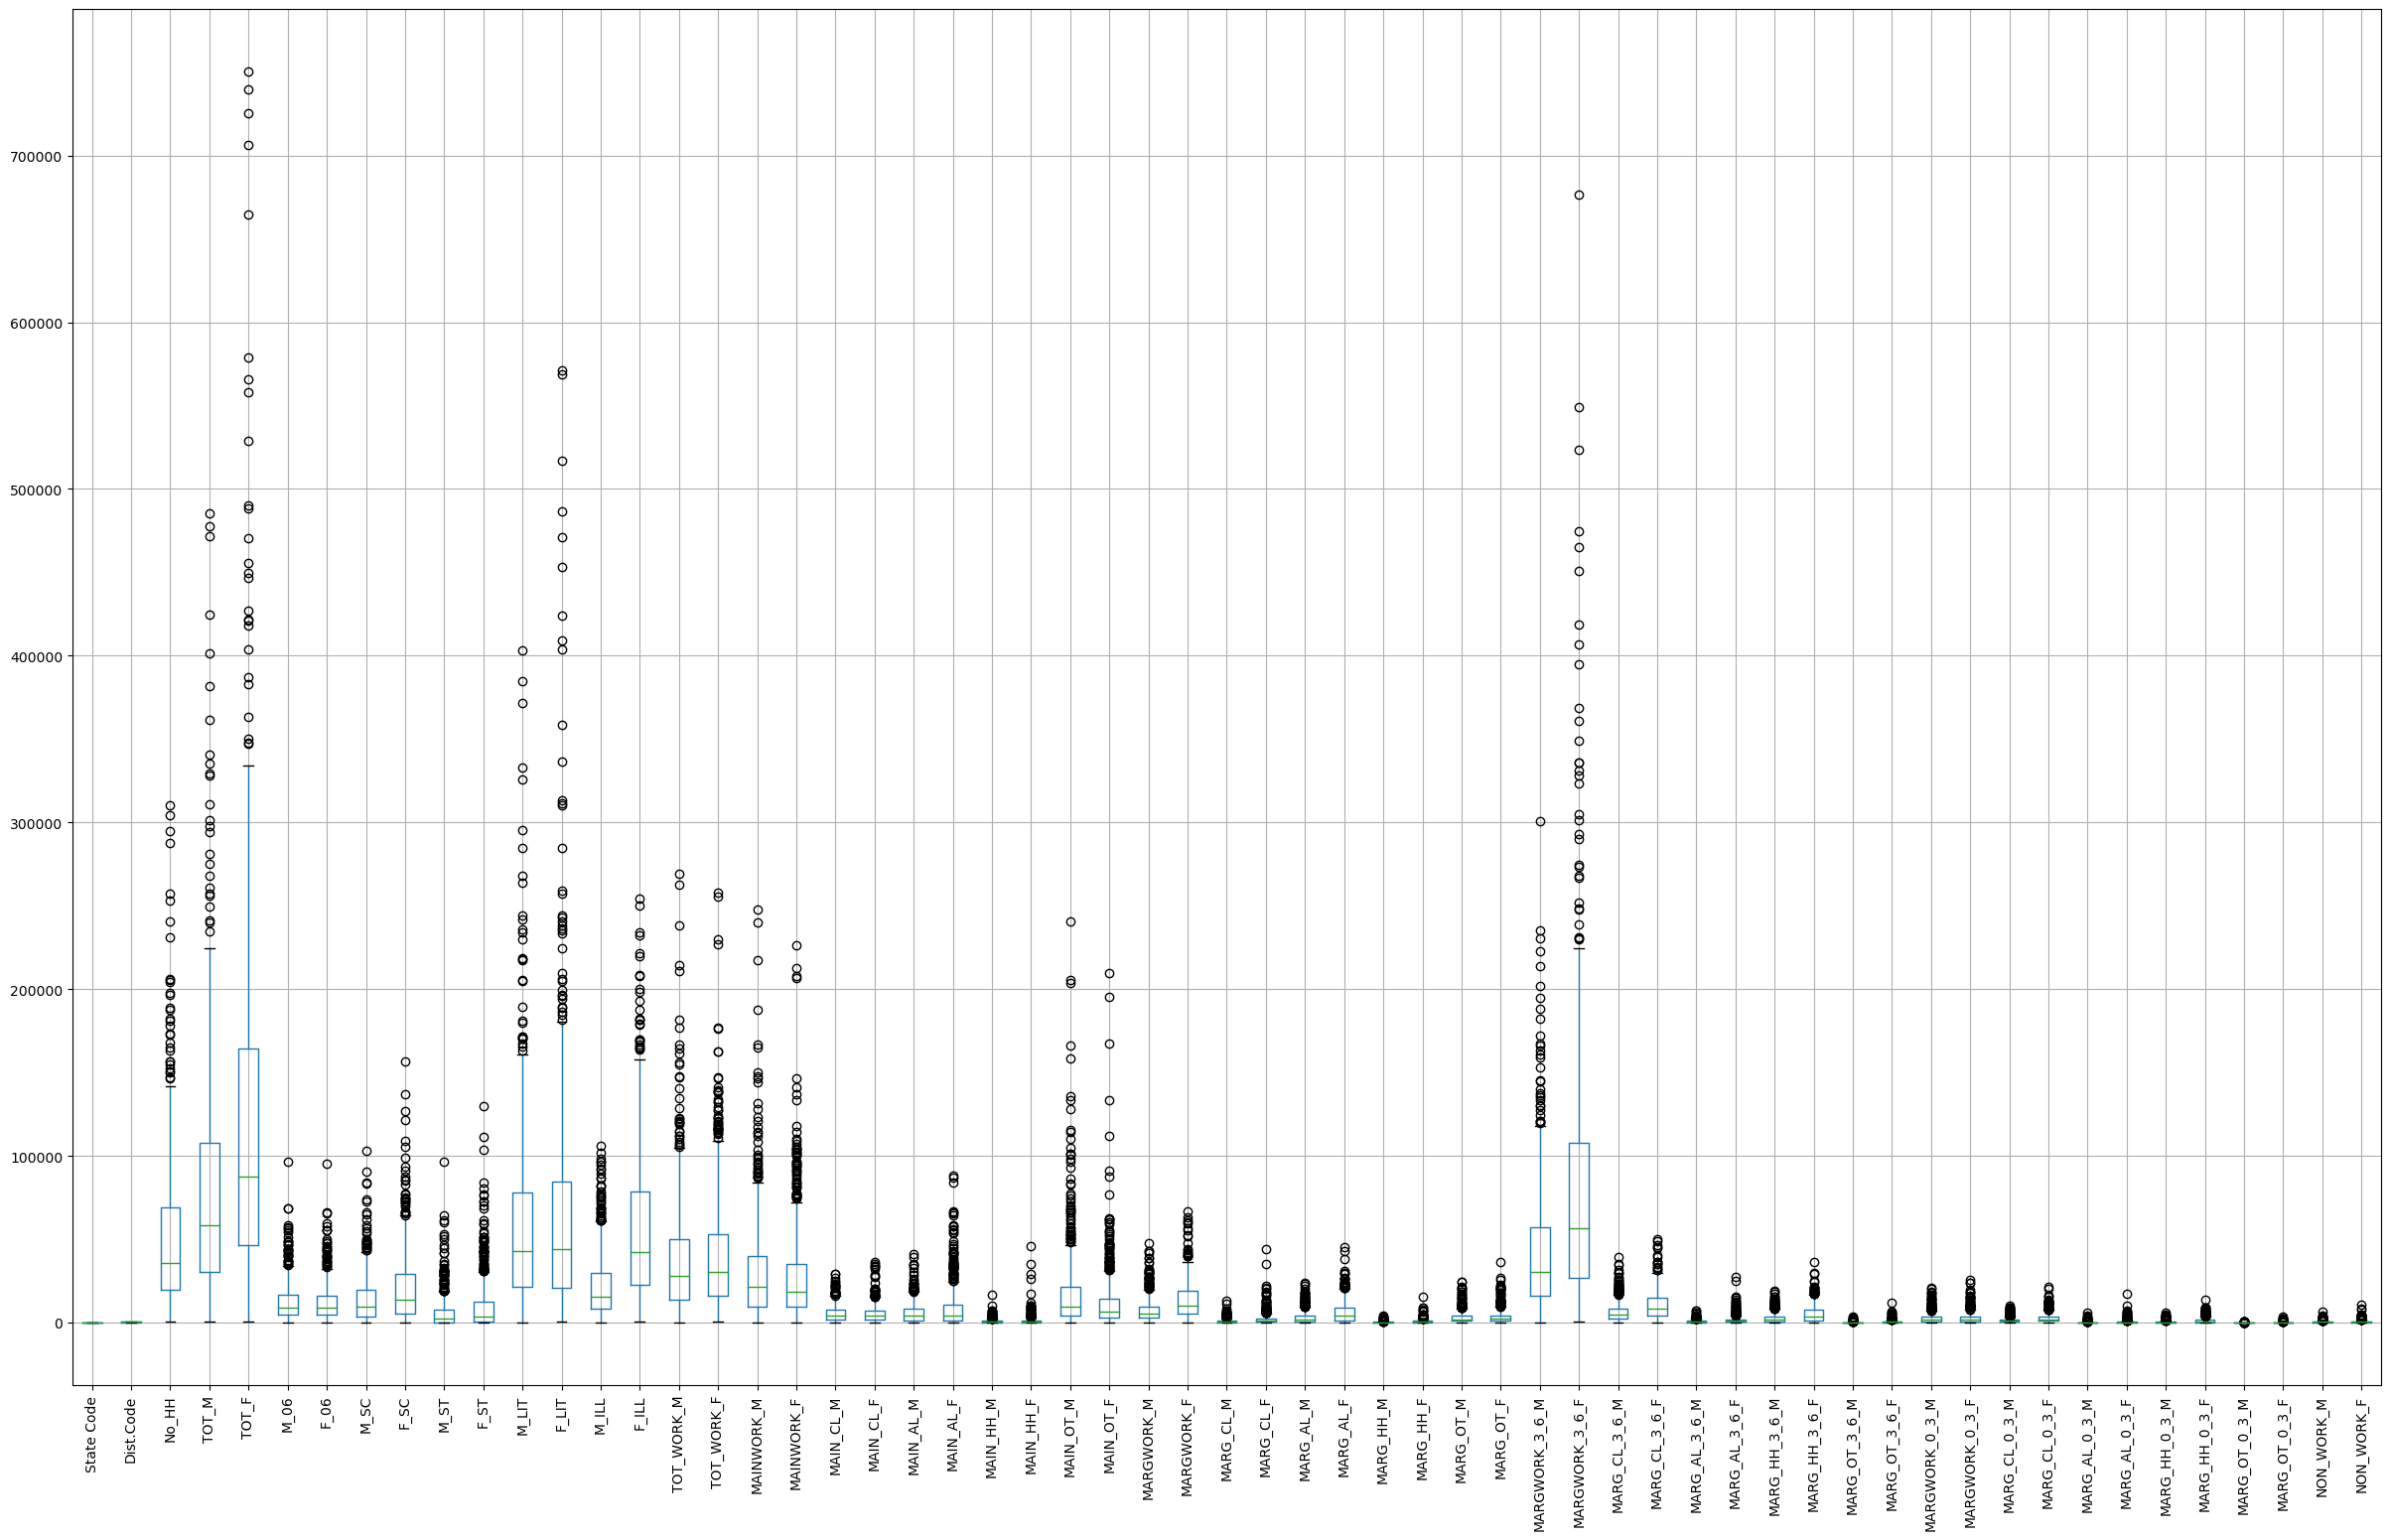

In [18]:
PCA.boxplot(figsize=(30,18))
plt.xticks(rotation=90)
plt.show()

In [19]:
def detect_outlier(col):
    Q1,Q3=np.percentile(col,(25,75))
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range
for column in PCA:
    
    lr,ur=detect_outlier(PCA[column])

    PCA[column]=np.where(PCA[column]>ur,ur,PCA[column])
    PCA[column]=np.where(PCA[column]<lr,lr,PCA[column])

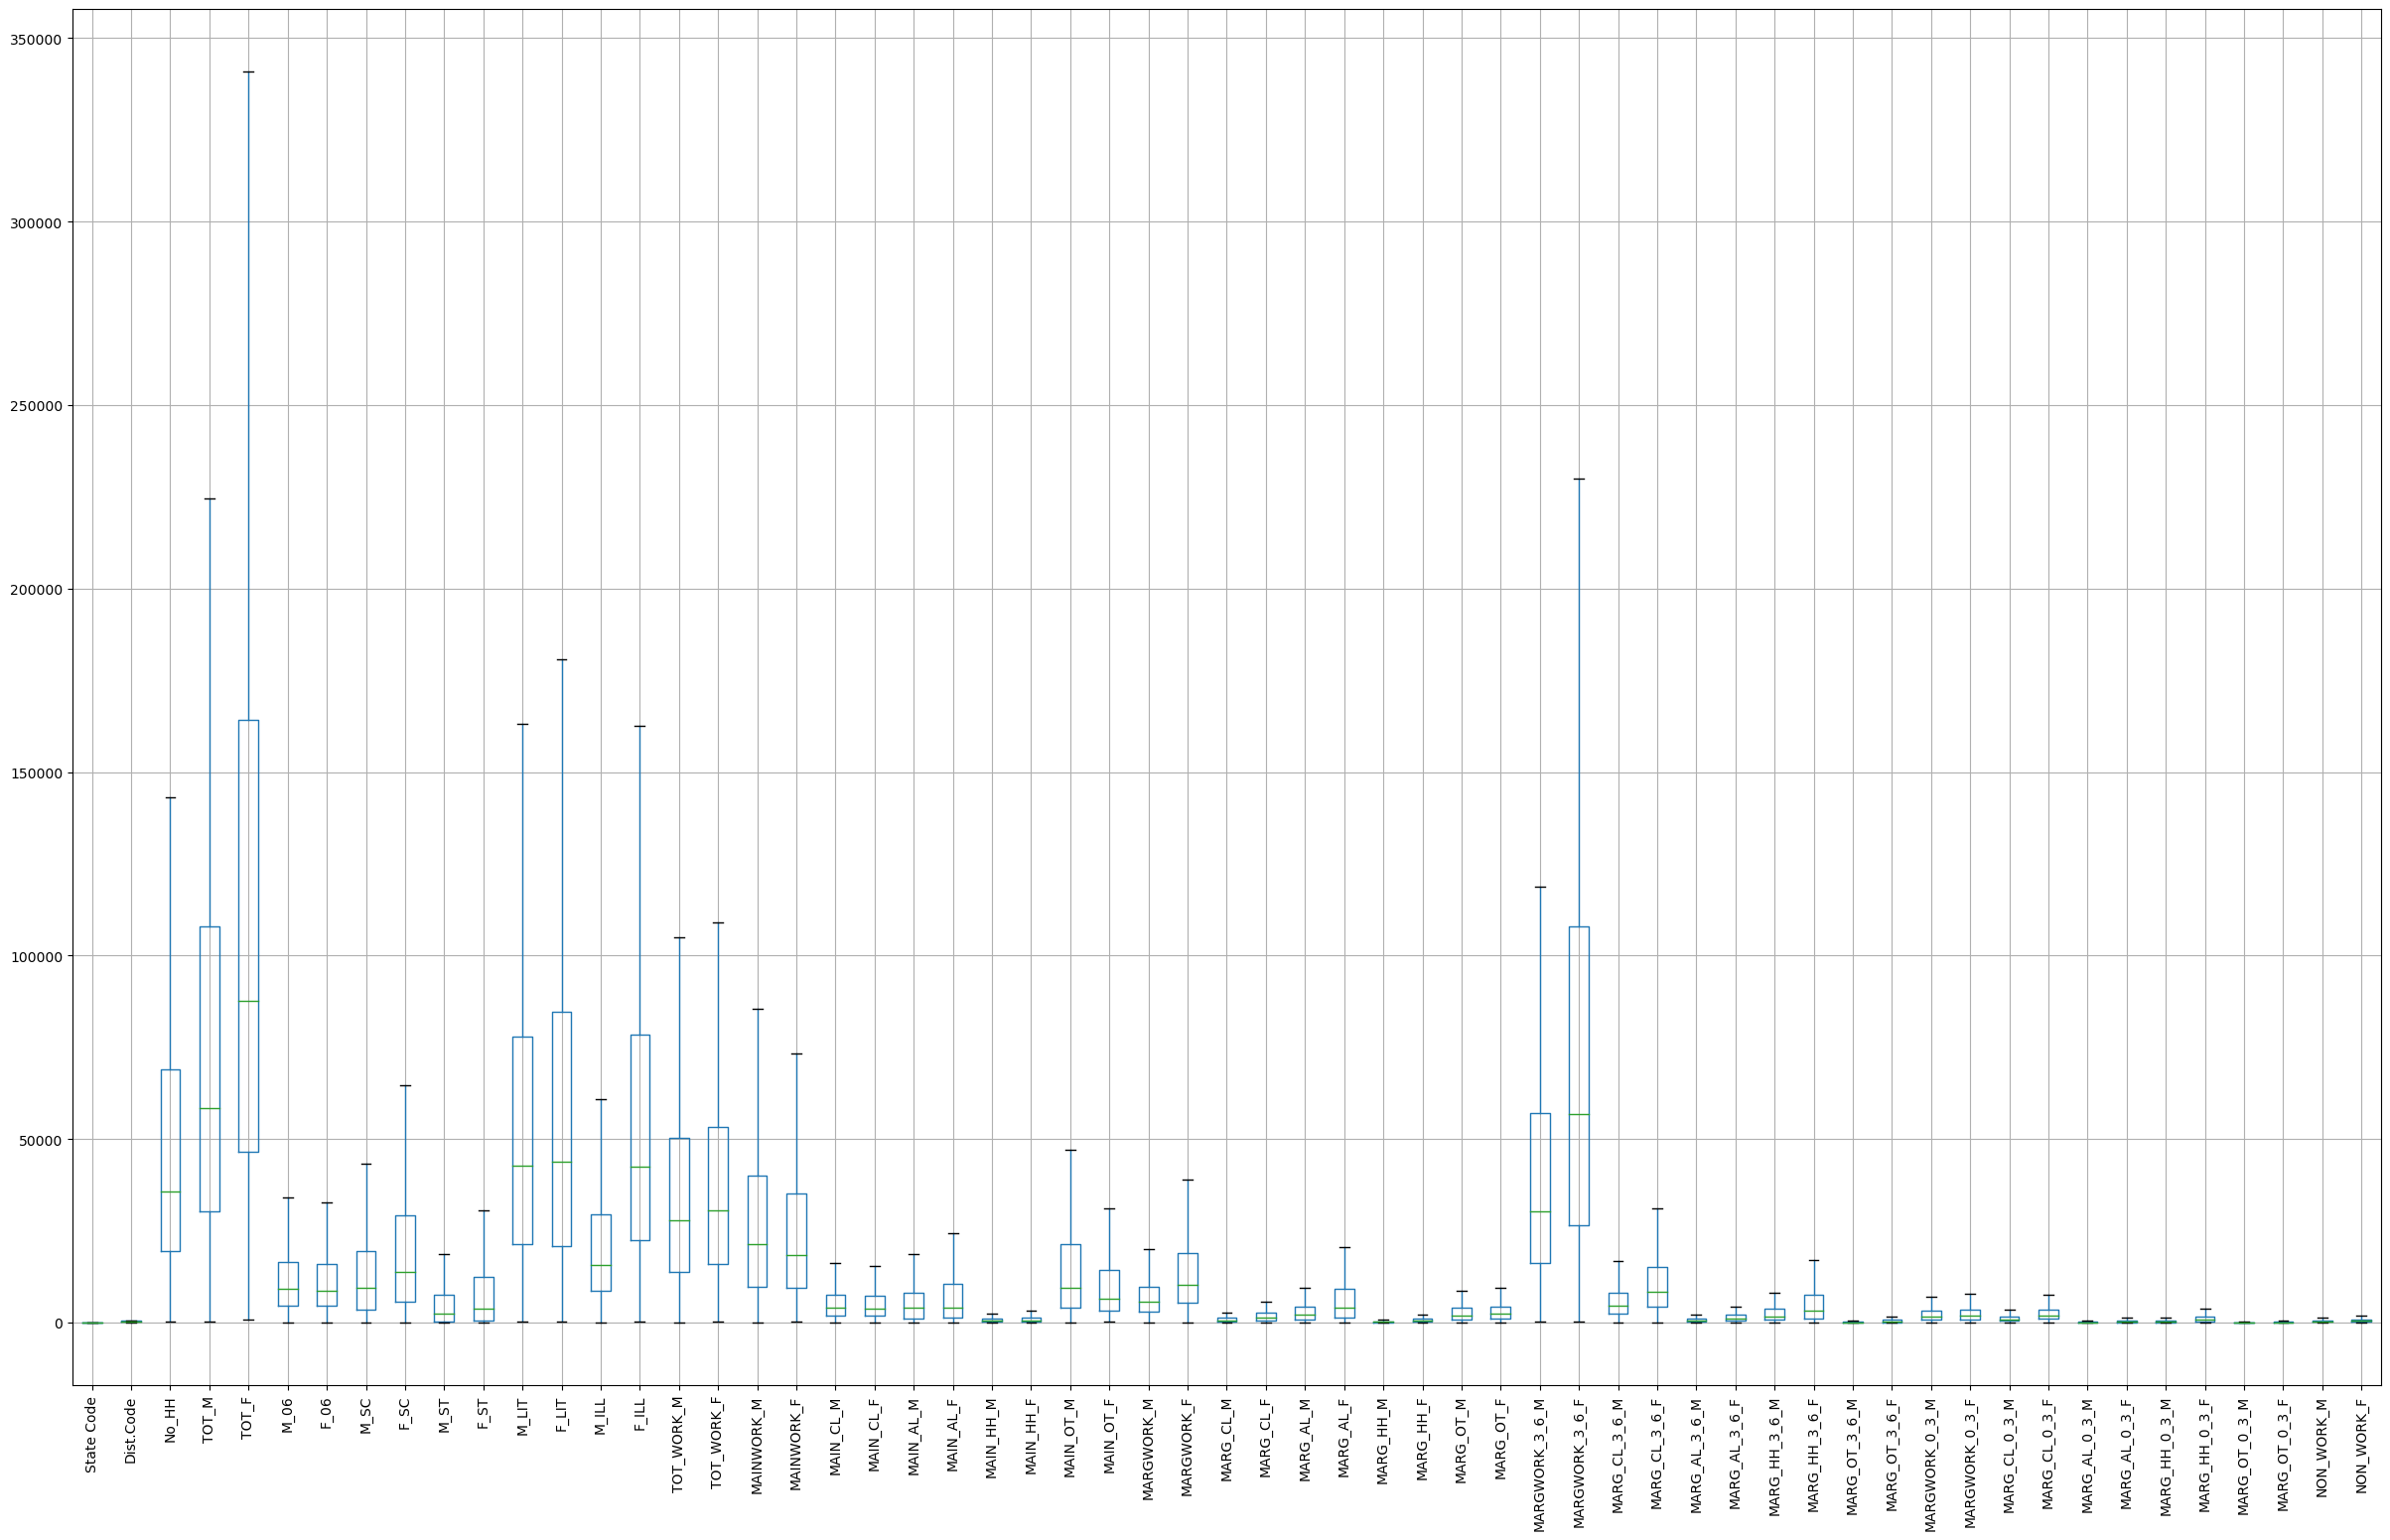

In [21]:
PCA.boxplot(figsize=(30,18))
plt.xticks(rotation=90)
plt.show()

In [22]:
from scipy.stats import zscore
df_pca_scaled = PCA.apply(zscore)
df_pca_scaled

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-1.710782,-1.729347,-1.038986,-0.874837,-0.937027,-0.624685,-0.561282,-1.080201,-1.079963,-0.510440,...,-0.093587,-0.860882,-0.041800,-0.423378,0.523468,-0.793688,-0.443385,-0.756991,-0.497493,-0.774865
1,-1.710782,-1.723934,-1.076896,-0.938023,-1.009723,-0.773932,-0.835657,-1.079873,-1.079635,-0.771833,...,-0.719169,-0.877096,-0.347040,-0.443790,-0.634478,-0.884805,0.358782,0.088391,-0.813235,-0.880662
2,-1.710782,-1.718521,-1.121858,-1.154665,-1.141539,-1.141642,-1.138104,-1.080201,-1.079635,0.122588,...,-1.130551,-1.128423,-0.770091,-0.800999,-1.063434,-0.984684,-1.026779,-1.025976,-1.008568,-1.074622
3,-1.710782,-1.713109,-1.201599,-1.217171,-1.214930,-1.197772,-1.176091,-1.080447,-1.079963,-0.399531,...,-1.050477,-1.100286,-0.679055,-0.701491,-1.039994,-0.970666,-0.953855,-0.987550,-0.877454,-1.078541
4,-1.710782,-1.707696,-0.938495,-0.921309,-0.935018,-0.700931,-0.740523,-1.078807,-1.078160,0.432534,...,-0.369844,-0.298617,1.484398,1.633130,-0.589942,-0.749882,-0.589234,-0.379131,-0.706204,-0.257637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1.792730,1.707696,-1.150348,-1.127949,-1.132667,-1.134720,-1.117495,-1.078725,-1.078324,-0.842834,...,-1.212628,-1.195666,-1.005714,-1.028083,-1.070466,-1.014472,-1.026779,-1.051594,-1.102220,-1.102051
636,1.792730,1.713109,-0.965024,-1.058299,-1.025046,-1.091676,-1.080734,-0.897218,-0.852926,-0.842834,...,-1.089513,-1.057365,-0.989649,-0.992362,-0.981393,-0.900575,-0.953855,-0.904293,-0.893509,-0.861070
637,1.898897,1.718521,-1.202745,-1.237690,-1.232045,-1.234110,-1.226443,-1.080447,-1.079963,-0.674559,...,-1.140561,-1.154175,-0.957519,-1.017877,-1.065778,-1.009215,-0.716851,-0.750587,-0.984485,-1.043275
638,1.898897,1.723934,-1.139425,-1.177029,-1.173597,-1.180468,-1.177539,-1.080447,-1.079963,-0.838178,...,-1.108531,-1.136053,-0.877193,-0.915817,-1.044682,-0.996073,-1.008548,-1.025976,-0.920267,-0.992336


In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [27]:
eigen_vectors = pca.components_
eigen_vectors

array([[ 3.03688860e-02,  3.03440259e-02,  1.49578258e-01,
         1.59042954e-01,  1.58309967e-01,  1.55991131e-01,
         1.56487962e-01,  1.43090989e-01,  1.43476574e-01,
         1.93807873e-02,  1.84416462e-02,  1.55136723e-01,
         1.45628500e-01,  1.54169234e-01,  1.58234026e-01,
         1.54144405e-01,  1.43017519e-01,  1.42128725e-01,
         1.26412729e-01,  1.11367253e-01,  8.30861699e-02,
         1.19622541e-01,  9.09501914e-02,  1.41586046e-01,
         1.34077902e-01,  1.22996830e-01,  1.17394626e-01,
         1.56268593e-01,  1.48601672e-01,  8.73132497e-02,
         6.44195801e-02,  1.26949621e-01,  1.16038294e-01,
         1.44893506e-01,  1.42057716e-01,  1.50709731e-01,
         1.48056619e-01,  1.57625556e-01,  1.55717155e-01,
         1.57298763e-01,  1.49488236e-01,  9.39879280e-02,
         6.64809183e-02,  1.27883007e-01,  1.14184121e-01,
         1.44646678e-01,  1.40809965e-01,  1.50762632e-01,
         1.47581457e-01,  1.42392766e-01,  1.33439705e-0

In [28]:
eigen_values = pca.explained_variance_
eigen_values

array([35.71084748,  7.98557733,  4.50785903,  2.77867519,  1.9747286 ,
        1.17776767,  1.13039501,  0.72210338,  0.46443167,  0.34677446,
        0.30596347,  0.26836481])

In [29]:
pca.explained_variance_ratio_

array([0.60432287, 0.13513729, 0.07628501, 0.0470226 , 0.03341768,
       0.01993097, 0.0191293 , 0.01221992, 0.00785942, 0.00586835,
       0.00517772, 0.00454145])

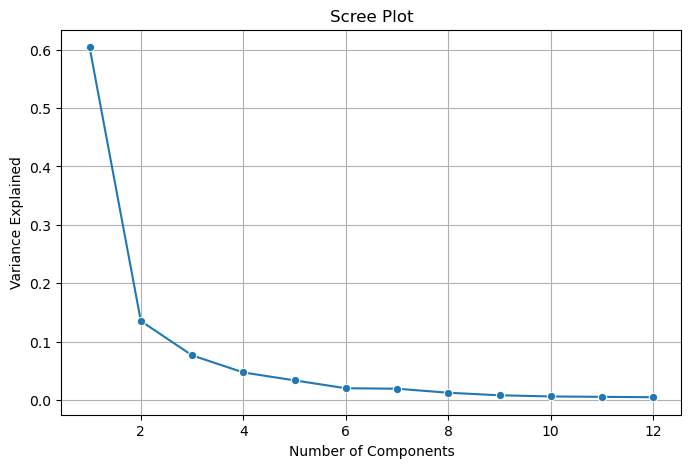

In [30]:
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,13),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()